## Read csv file

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import glob
import json







['./test/images/46_jpg.rf.07e5d28232700ea8e6e3ac118c702253.jpg', './test/images/30_jpg.rf.1e98d03629c1739268a86d8ded3117ad.jpg', './test/images/13_jpg.rf.78259f669856f74f7225809ac434117c.jpg', './test/images/351_jpg.rf.b6af3eceb2ea8ef9af5fb2c58293521f.jpg', './test/images/48_jpg.rf.a1349ae215a18729504dd757f83c1bdd.jpg', './test/images/12_jpg.rf.bd1279c51ed206ec6eb8ee58c746b3d8.jpg', './test/images/55_jpg.rf.2a975d1105364879b028f872130ece8d.jpg', './test/images/87_jpg.rf.c176006d83229e1b171e23eb3d565213.jpg', './test/images/64_jpg.rf.22087d1ea43b190a420acd2325b7cb67.jpg', './test/images/89_jpg.rf.47129c5aa5755406ce406cae7ae2475e.jpg', './test/images/40_jpg.rf.0e6ca763b87574a29ab09842388cf809.jpg', './test/images/12_jpg.rf.47336431d70f9b5bac5d4c7056733e25.jpg', './test/images/25_jpg.rf.df814239b194177b55c85c9e87273efc.jpg', './test/images/129_jpg.rf.fbeb6e97e3e545e86824ff01733c8387.jpg', './test/images/7_jpg.rf.3eea949e6a2a3ebc56c3c3287cf8ad38.jpg', './test/images/11_jpg.rf.a5888f244e468

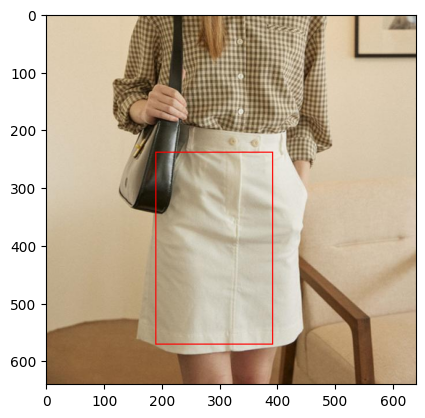

In [25]:
class FashionDataset(Dataset):
    
    def __init__(self, img_dir, label_dir):
        
        self.img_dir = img_dir
        self.label_dir = label_dir

        self.image_path = glob.glob(os.path.join(img_dir, "*.jpg"))
        print(self.image_path)
        self.label_path = glob.glob(os.path.join(label_dir, "*.txt"))
        
        
    def __len__(self, ):
        return len(self.image_path)
    
    def __getitem__(self, idx):
        
        image_path = self.image_path[idx]
        print(image_path)
        label_path = self.label_path[idx]
        print(label_path)
        image = Image.open(image_path)
        img_width, img_height = image.size
        
        box = []
        with open(label_path, 'r') as f:
            labels = [line.strip().split() for line in f.readlines()]
        for label in labels:
                
            class_id = int(label[0])
            x_center = float(label[1]) * img_width
            y_center = float(label[2]) * img_height
            width = float(label[3]) *img_width
            height = float(label[4])* img_height 
                
                # Convert to x_min, y_min, x_max, y_max in pixel coordinates
            x_min = x_center - width / 2
            y_min = y_center - height / 2
            x_max = x_center + width / 2
            y_max = y_center + height / 2
            x_min, y_min, x_max, y_max = float(x_min), float(y_min), float(x_max), float(y_max)
            box.append((x_min, y_min, x_max, y_max))
            draw = ImageDraw.Draw(image)
            draw.rectangle([x_min, y_min, x_max, y_max], outline = 'red', width = 2)
        return image
                
                
                
                
                
                    
                            
            
    
    
base_path = './'
image_dir = os.path.join(base_path, 'test', 'images')
label_dir = os.path.join(base_path, 'test', 'labels')
    
    
        
dataset  = FashionDataset(image_dir, label_dir)
print(len(dataset))
image = dataset[0]
plt.imshow(image)
plt.show()



Labels for ./test/images/100_jpg.rf.059f192a93bc8469abfba64c70c483f6.jpg: ['38 0.49921875 0.54453125 0.66015625 0.7484375']
Processed label: ['38', '0.49921875', '0.54453125', '0.66015625', '0.7484375']
Drawing box: 108.25, 109.0, 530.75, 588.0


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/zohreh/snap/code/common/.cache/gio-modules/libgiolibproxy.so


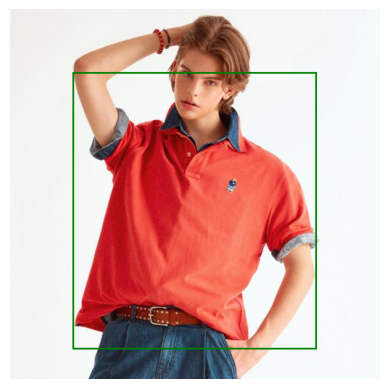

eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [40]:
import os
import glob
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

class FashionDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        
        # Get a sorted list of all jpg files in the image directory
        self.image_files = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
        # Get a sorted list of all label files in the label directory
        self.label_files = sorted(glob.glob(os.path.join(label_dir, '*.txt')))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        label_path = self.label_files[idx]
        
        # Load the image
        image = Image.open(image_path).convert('RGB')
        img_width, img_height = image.size
        
        # Load the label (bounding box coordinates)
        box = []
        with open(label_path, 'r') as f:
            labels = f.readlines()
            print(f"Labels for {image_path}: {labels}")  # Debugging

        for label in labels:
            label = label.strip().split()
            print(f"Processed label: {label}")  # Debugging
            
            class_id = int(label[0])
            x_center = float(label[1]) * img_width
            y_center = float(label[2]) * img_height
            width = float(label[3]) * img_width
            height = float(label[4]) * img_height
            
            # Convert to x_min, y_min, x_max, y_max in pixel coordinates
            x_min = x_center - width / 2
            y_min = y_center - height / 2
            x_max = x_center + width / 2
            y_max = y_center + height / 2
            
            # Ensure coordinates are floats
            x_min, y_min, x_max, y_max = float(x_min), float(y_min), float(x_max), float(y_max)
            box.append((x_min, y_min, x_max, y_max))
            
            print(f"Drawing box: {x_min}, {y_min}, {x_max}, {y_max}")  # Debugging
            
            # Draw the bounding box on the original image
            draw = ImageDraw.Draw(image)
            draw.rectangle([x_min, y_min, x_max, y_max], outline="green", width=3)
        
        # Return the image with bounding boxes
        return image

# Example usage
base_path = './test'
images_dir = os.path.join(base_path, 'images')
labels_dir = os.path.join(base_path, 'labels')

dataset = FashionDataset(images_dir, labels_dir)
image = dataset[0]  # Get the first sample

# Display the image with bounding boxes
image.show()  # Display using PIL's show method

# Alternatively, display using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1807.jpg: 640x480 1 jacket, 1 pants, 68.8ms
Speed: 2.6ms preprocess, 68.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

   

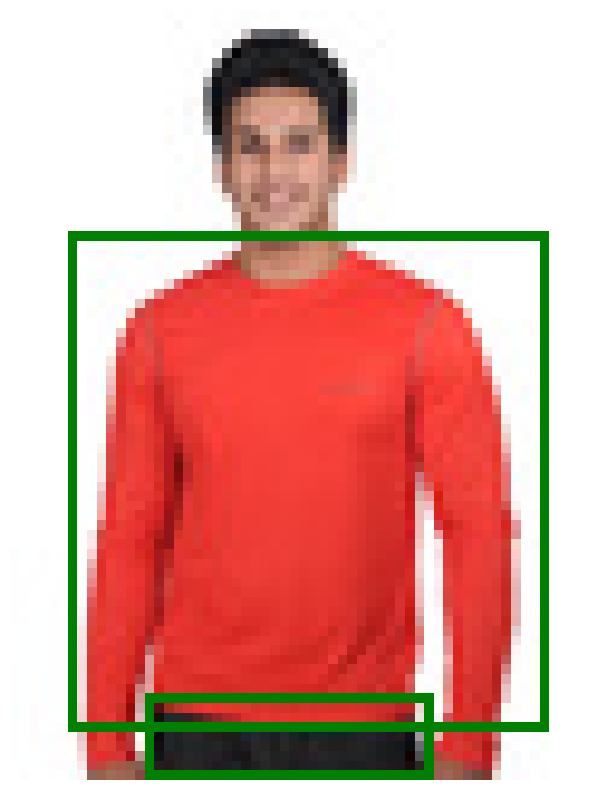

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image, ImageDraw, ImageFont
!pip install ultralytics # instal ultralytics package, which provides functionality for training, evaluating, and deploying YOLO models

from ultralytics import YOLO




base_path = "/content/drive/MyDrive/object_detection"

new_base_path = '/content/drive/MyDrive/new_fashion_dataset'
new_images_path = os.path.join(new_base_path, 'new_images')


#Load sample image
sample_image_path = image_paths[0]
image = Image.open(sample_image_path).convert('RGB')
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()


# Load the trained model
runs_path = os.path.join(base_path, 'runs', 'detect')
weights_save_path = os.path.join(runs_path, 'train7', 'weights')
best_weights_path = os.path.join(weights_save_path, "best.pt")



# Load model and perform inference
model = YOLO(best_weights_path)
results = model(sample_image_path)
print(results[0])

for result in results:
  boxes = result.boxes

  for box in boxes:

    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
    confidence = box.conf[0].item()         # Get confidence score
    class_id = int(box.cls[0])              # Get class id
    label = model.names[class_id]           # Get label for class id

    # Draw bounding box on the image
    draw.rectangle([x1, y1, x2, y2], outline="green", width=1)
    # Put label and confidence score on the image
    # draw.text((x1, y1 - 10), f"{label} {confidence:.2f}", fill="green", font=font)

#Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()




image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1807.jpg: 640x480 1 jacket, 1 pants, 55.7ms
Speed: 2.4ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

   

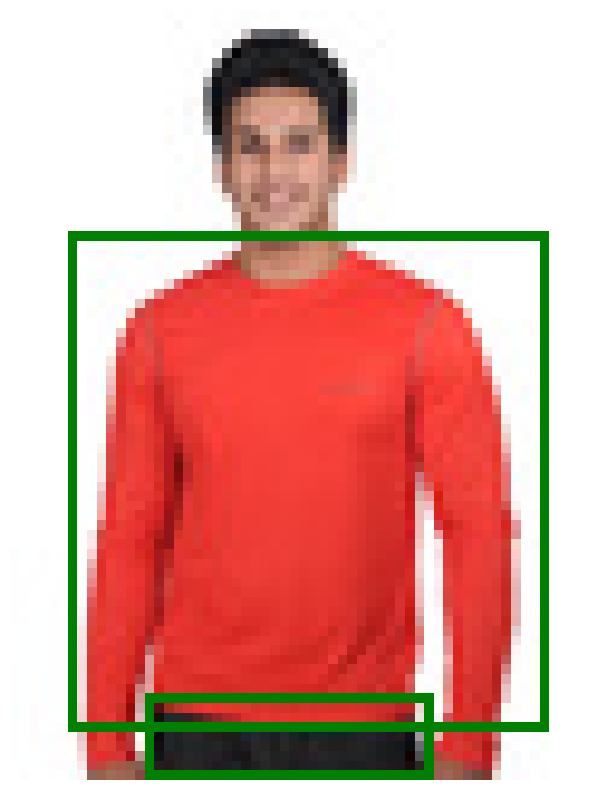

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_1807.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2249.jpg: 640x480 1 dress, 47.3ms
Speed: 2.4ms preprocess, 47.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

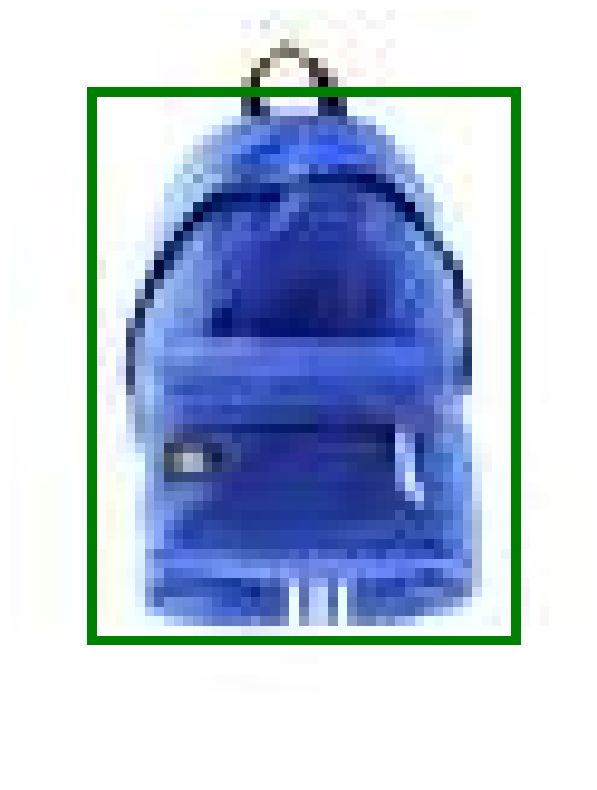

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2249.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2602.jpg: 640x480 1 dress, 47.3ms
Speed: 2.9ms preprocess, 47.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

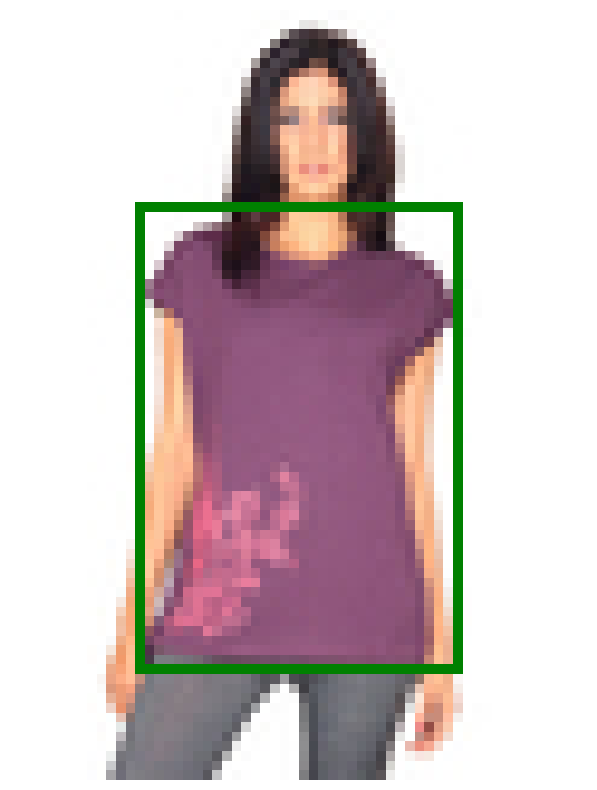

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2602.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2956.jpg: 640x480 1 dress, 47.4ms
Speed: 2.4ms preprocess, 47.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

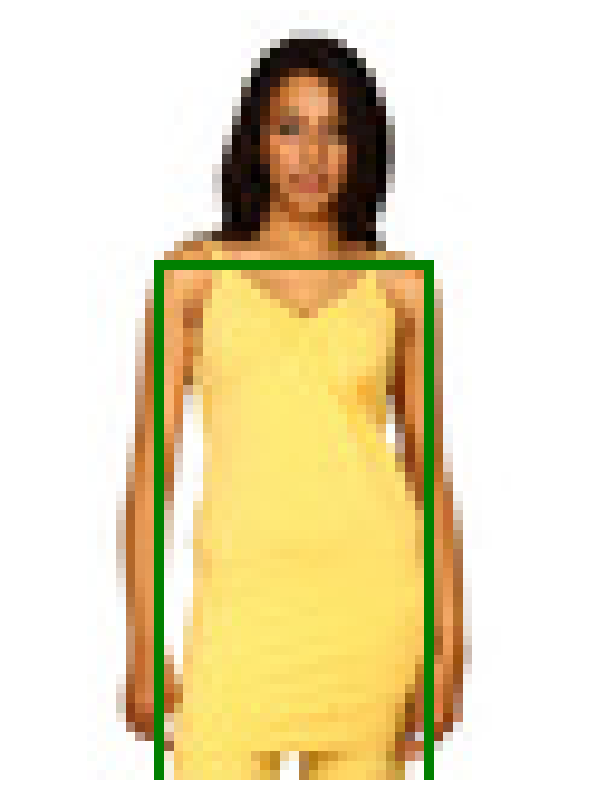

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2956.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/40999.jpg: 640x480 1 jacket, 47.3ms
Speed: 2.4ms preprocess, 47.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
      

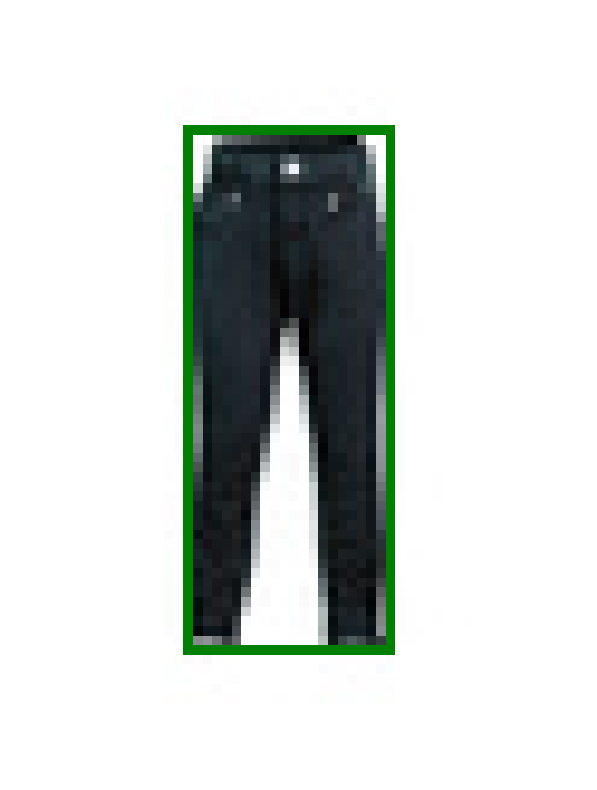

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_40999.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/51982.jpg: 640x480 1 dress, 47.4ms
Speed: 2.5ms preprocess, 47.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
      

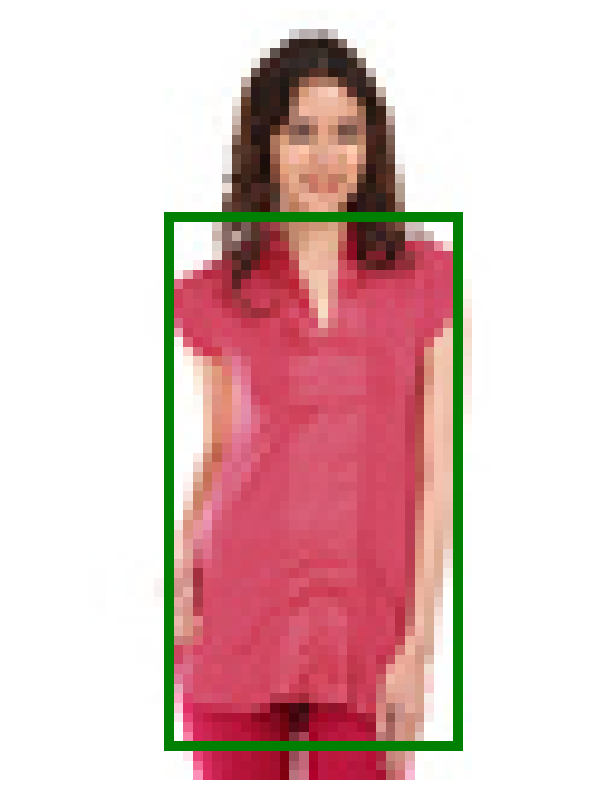

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_51982.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5780.jpg: 640x480 1 dress, 49.6ms
Speed: 2.3ms preprocess, 49.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
       

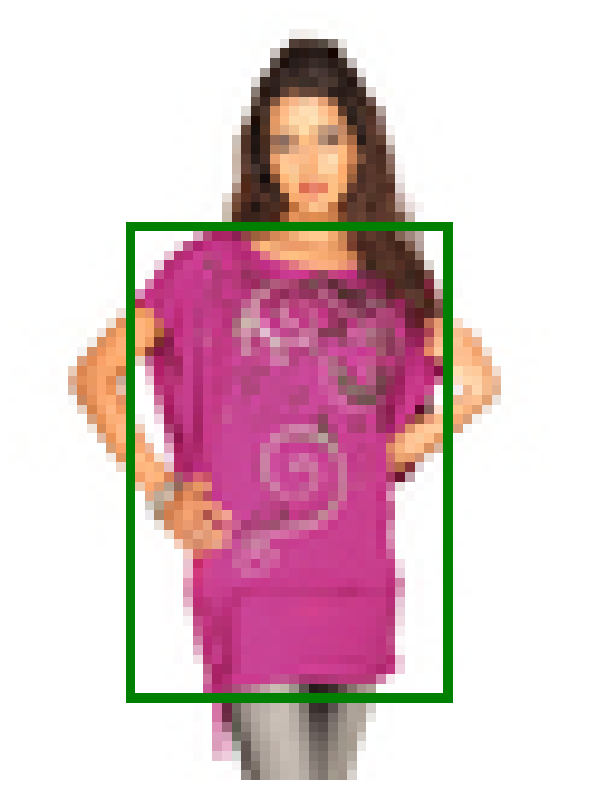

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_5780.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5854.jpg: 640x480 1 dress, 47.4ms
Speed: 2.4ms preprocess, 47.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

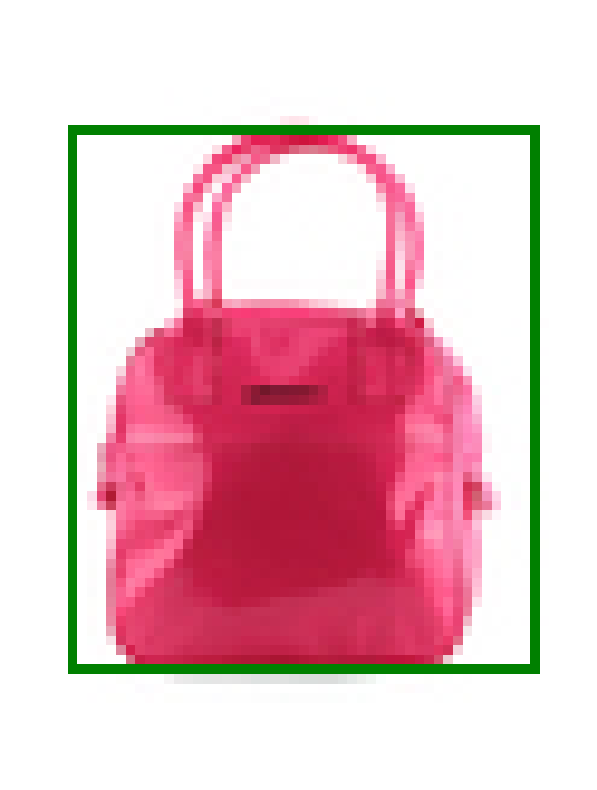

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_5854.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1563.jpg: 640x480 1 dress, 64.9ms
Speed: 2.6ms preprocess, 64.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

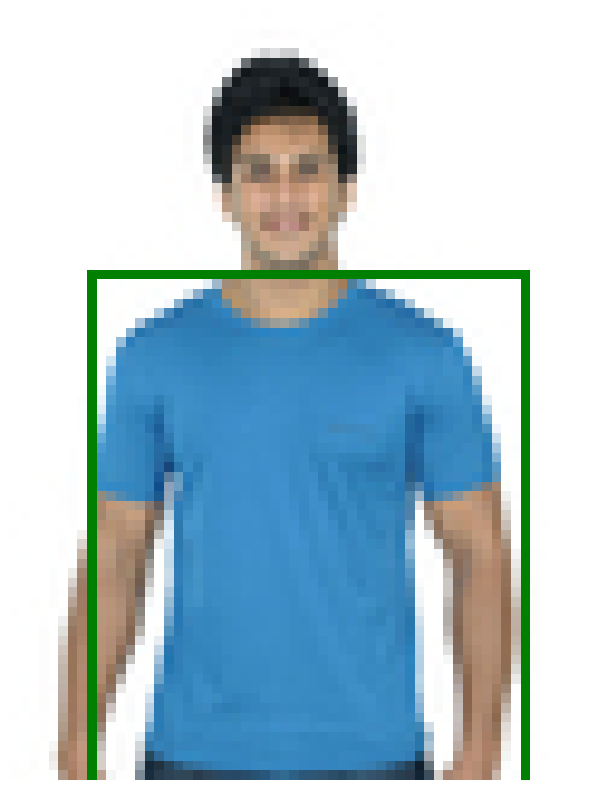

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_1563.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg: 640x480 1 jacket, 67.1ms
Speed: 2.6ms preprocess, 67.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
       

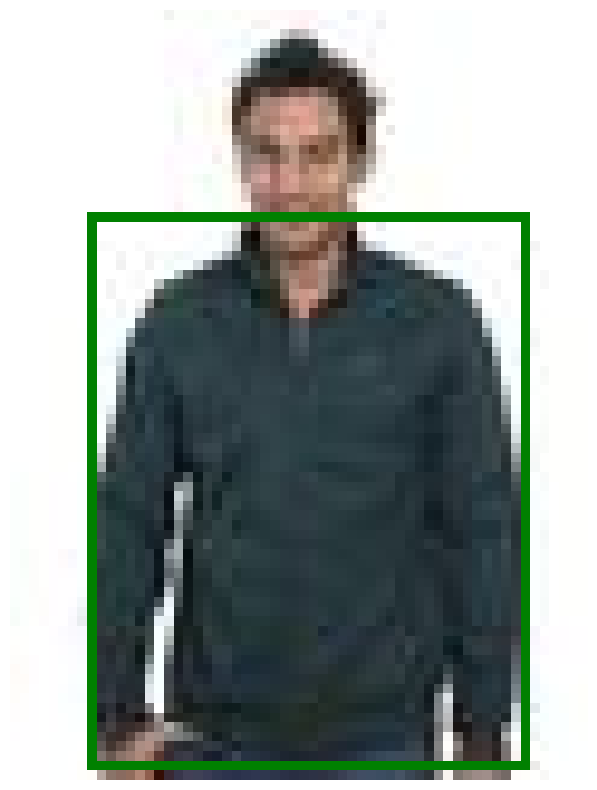

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2031.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1539.jpg: 640x480 1 dress, 65.1ms
Speed: 2.3ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

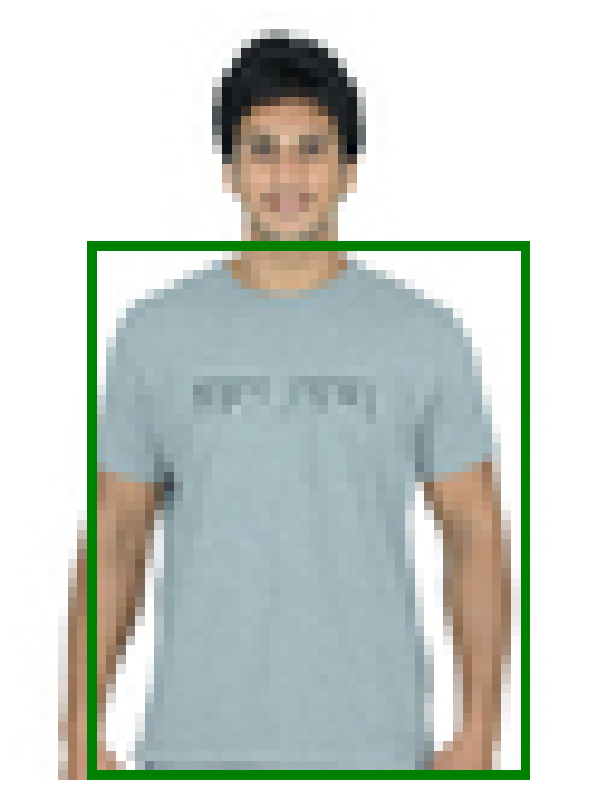

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_1539.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg: 640x480 1 jacket, 65.0ms
Speed: 3.7ms preprocess, 65.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
       

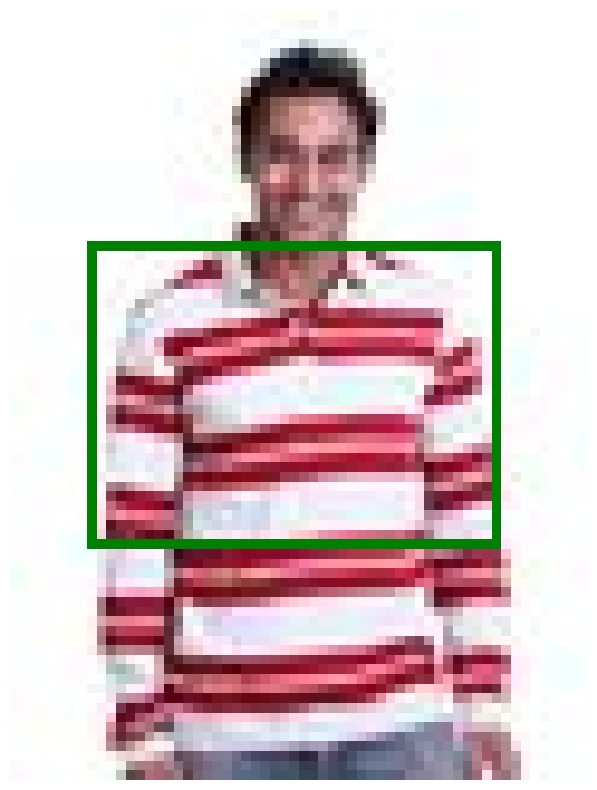

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2154.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/33589.jpg: 640x480 1 shirt, 1 pants, 64.8ms
Speed: 2.5ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

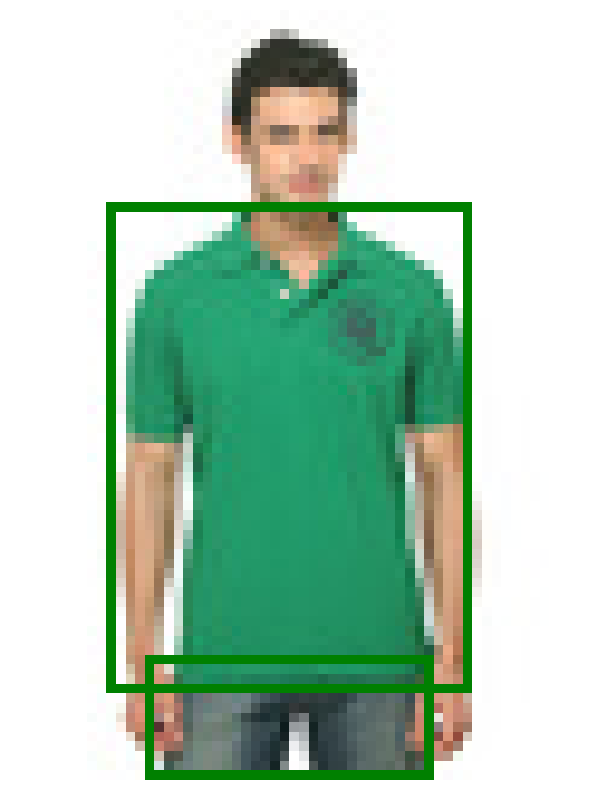

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_33589.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1533.jpg: 640x480 2 dresss, 64.9ms
Speed: 3.8ms preprocess, 64.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
      

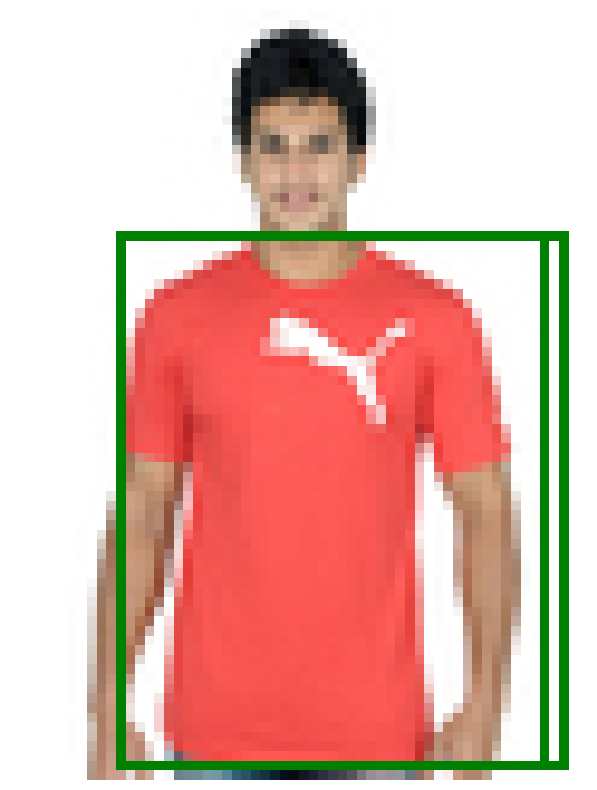

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_1533.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1992.jpg: 640x480 1 shirt, 1 pants, 64.9ms
Speed: 3.3ms preprocess, 64.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],

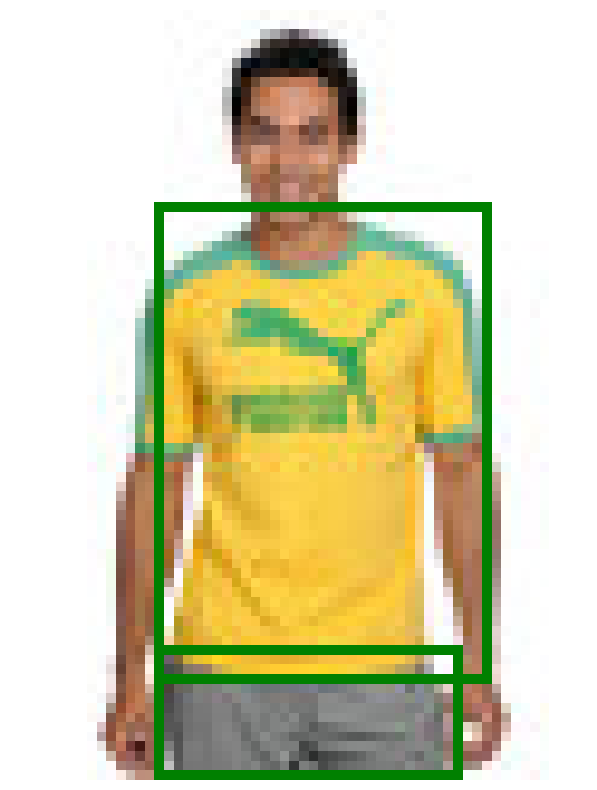

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_1992.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2024.jpg: 640x480 (no detections), 64.9ms
Speed: 2.3ms preprocess, 64.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


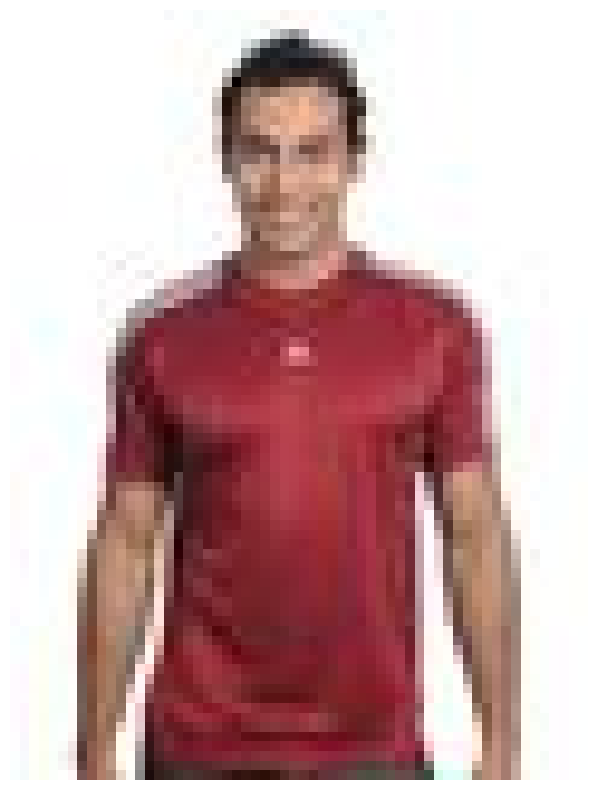

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2024.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4745.jpg: 640x480 1 shirt, 1 pants, 1 dress, 68.6ms
Speed: 2.3ms preprocess, 68.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 2

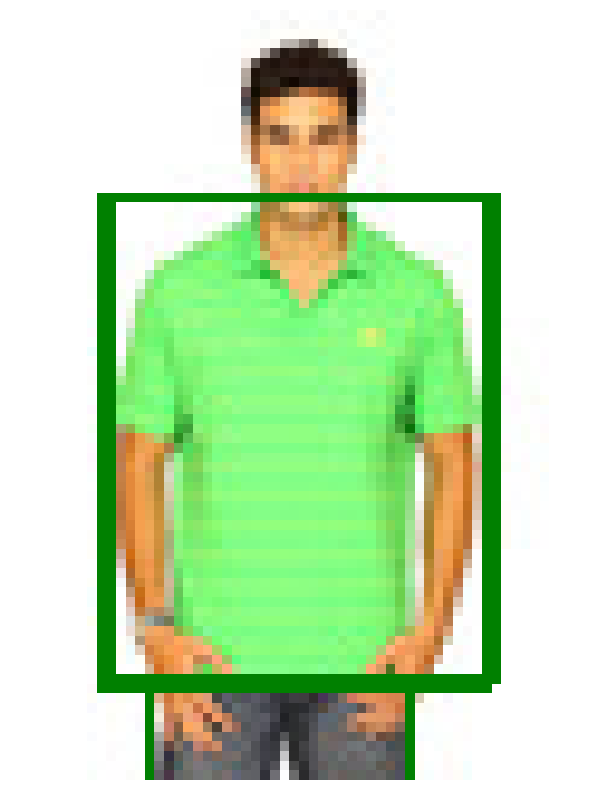

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_4745.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2492.jpg: 640x480 (no detections), 64.8ms
Speed: 2.4ms preprocess, 64.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


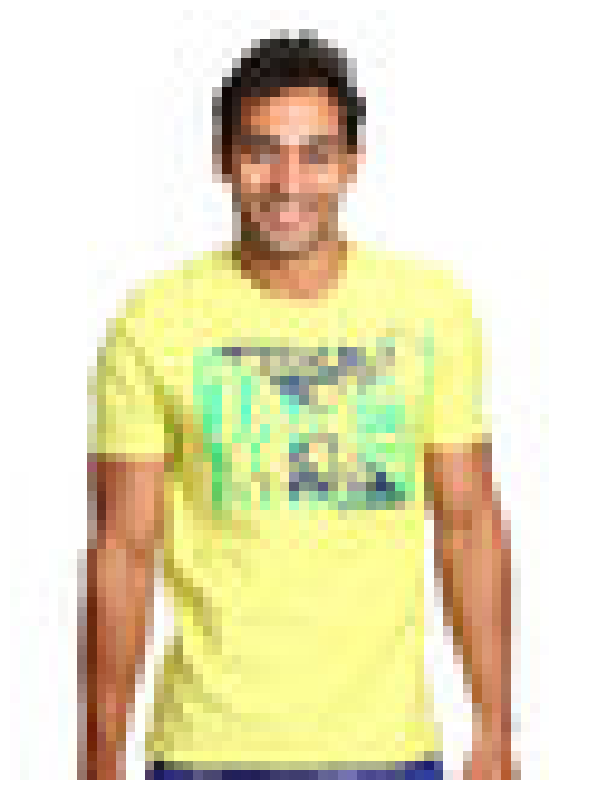

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2492.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2480.jpg: 640x480 2 dresss, 64.9ms
Speed: 2.3ms preprocess, 64.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
       

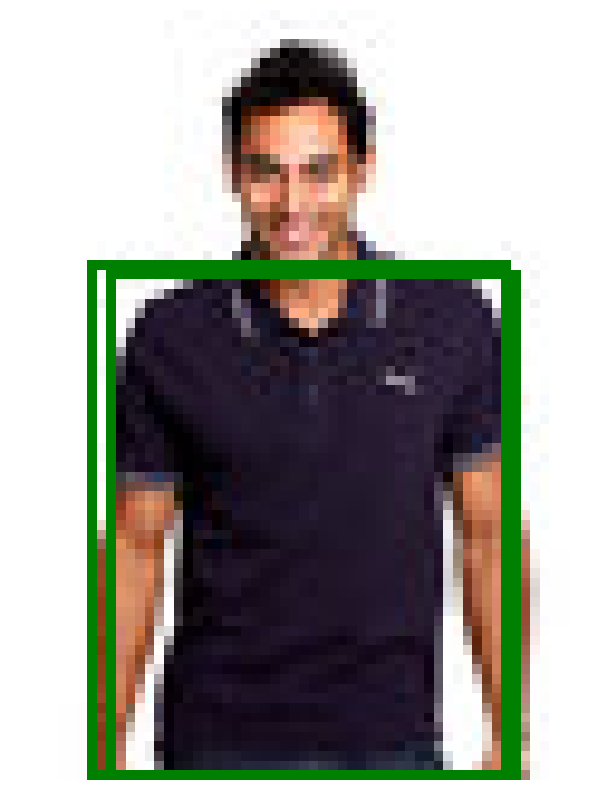

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2480.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2400.jpg: 640x480 1 shirt, 64.8ms
Speed: 2.5ms preprocess, 64.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

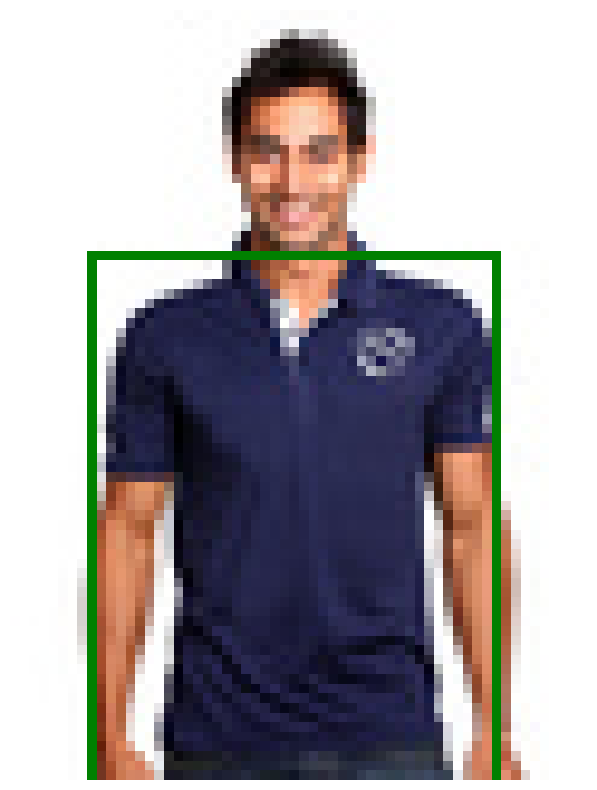

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2400.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2478.jpg: 640x480 1 jacket, 65.5ms
Speed: 3.8ms preprocess, 65.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
       

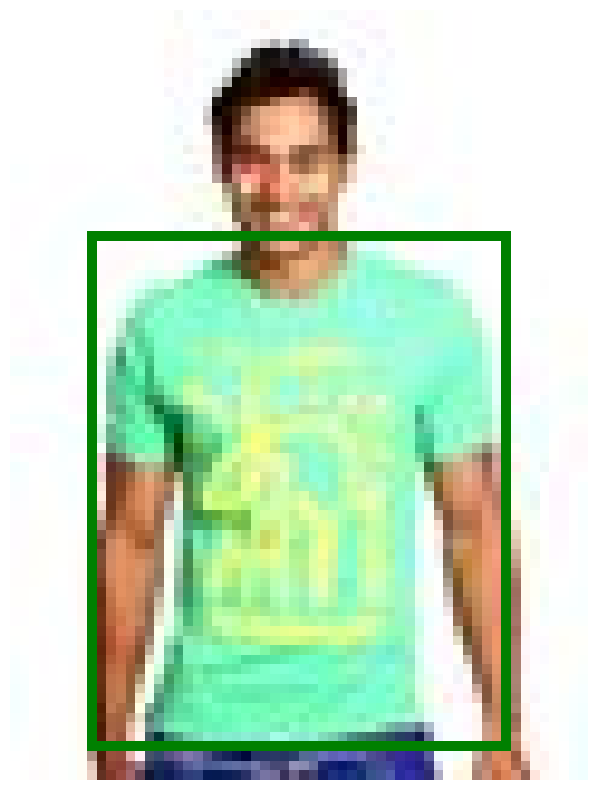

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2478.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2479.jpg: 640x480 (no detections), 65.0ms
Speed: 7.7ms preprocess, 65.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


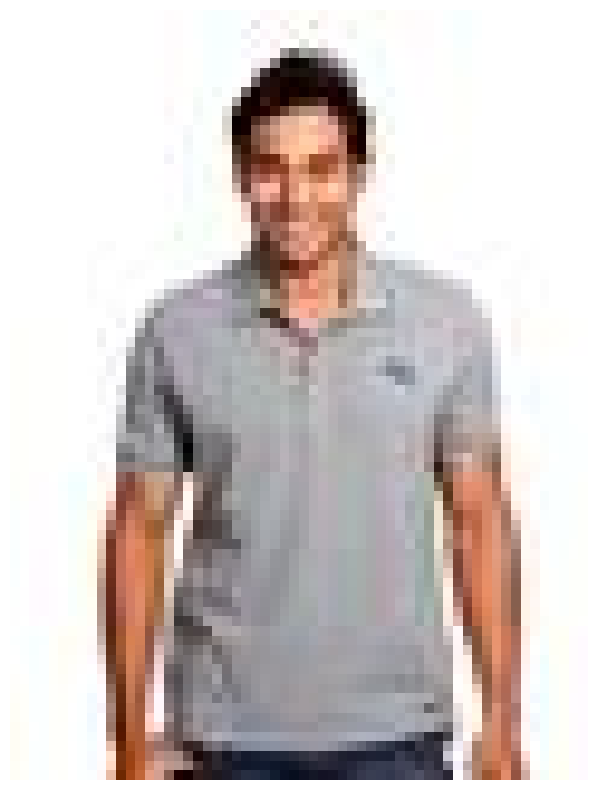

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2479.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2343.jpg: 640x480 (no detections), 64.8ms
Speed: 2.4ms preprocess, 64.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


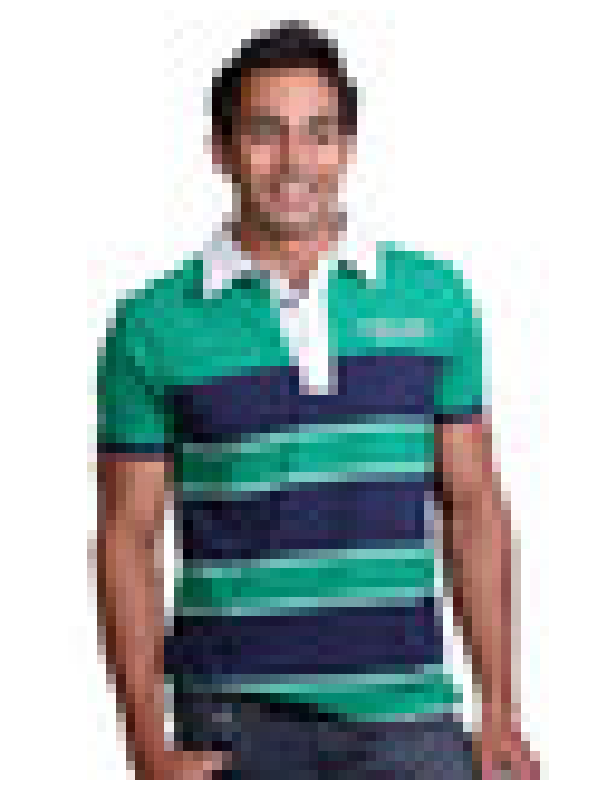

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2343.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2491.jpg: 640x480 1 dress, 69.7ms
Speed: 2.3ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

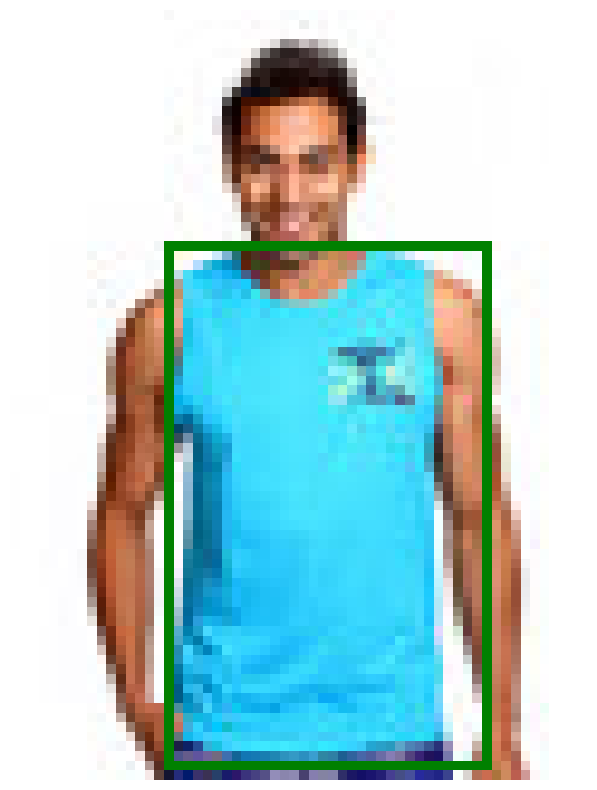

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2491.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4986.jpg: 640x480 (no detections), 64.8ms
Speed: 2.3ms preprocess, 64.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


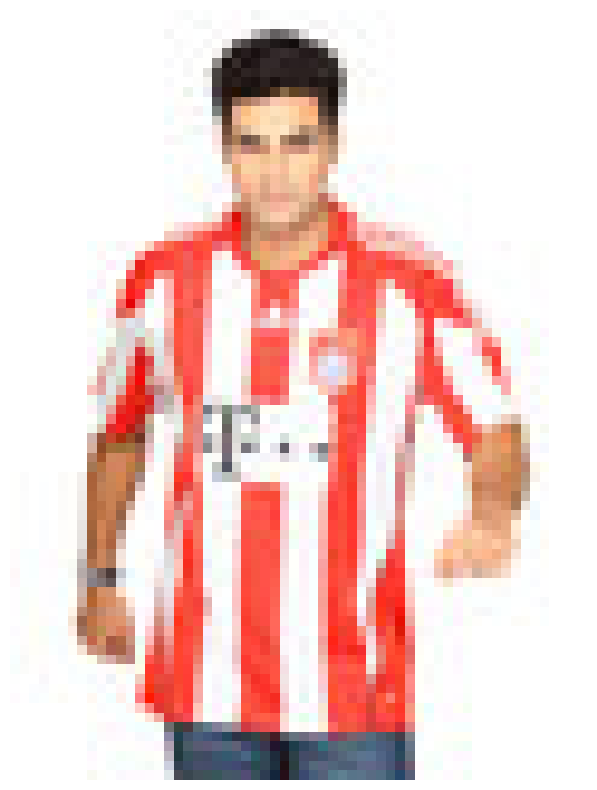

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_4986.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2329.jpg: 640x480 (no detections), 64.9ms
Speed: 2.5ms preprocess, 64.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


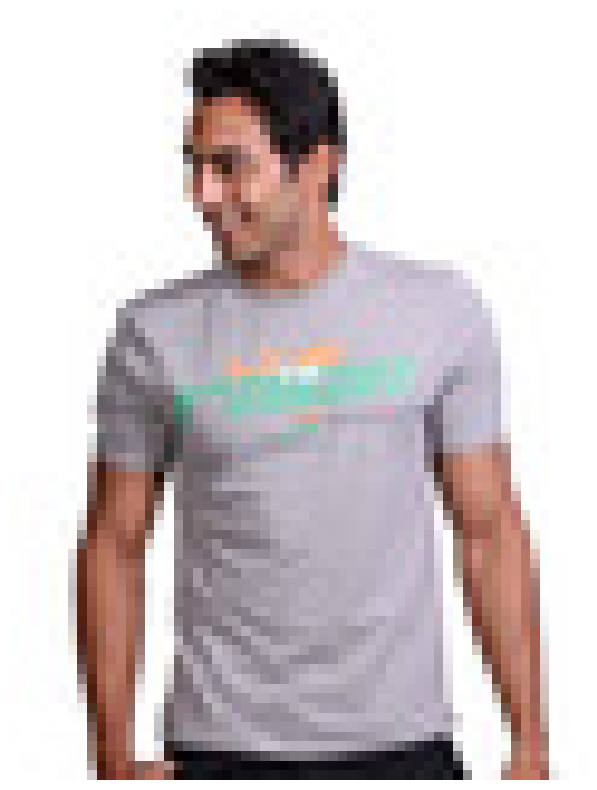

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_2329.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/3964.jpg: 640x480 1 dress, 65.1ms
Speed: 2.3ms preprocess, 65.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

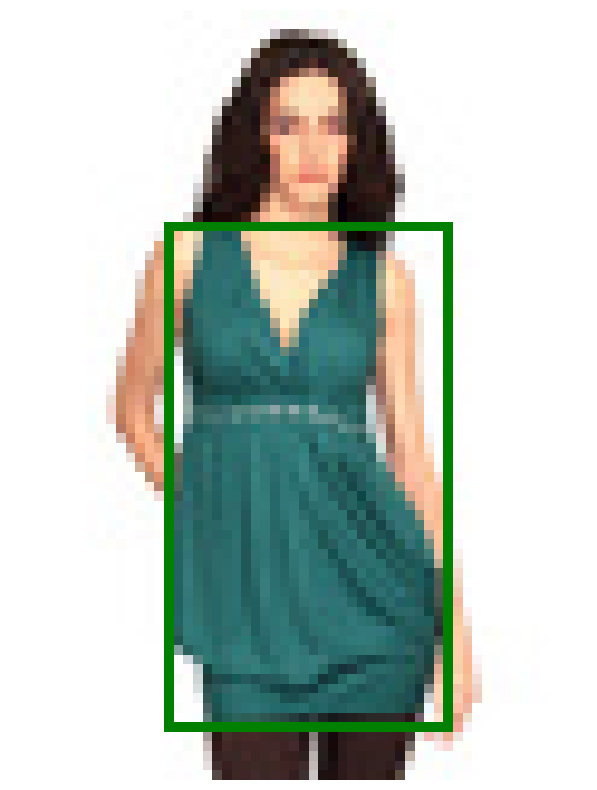

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_3964.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/3571.jpg: 640x480 1 dress, 65.0ms
Speed: 2.5ms preprocess, 65.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

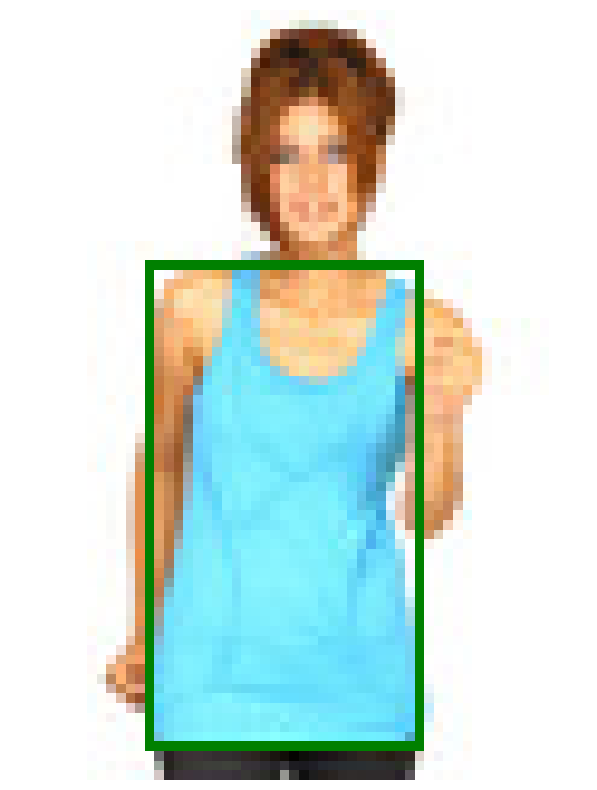

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_3571.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4265.jpg: 640x480 1 dress, 64.9ms
Speed: 2.6ms preprocess, 64.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        

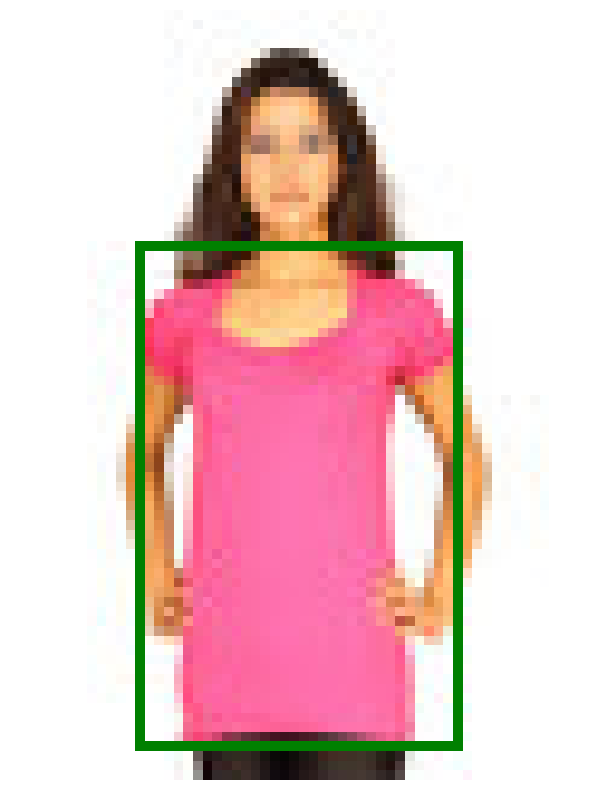

Saved image with bounding boxes: /content/drive/MyDrive/new_fashion_dataset/output_images/detected_4265.jpg


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO

# Define paths
base_path = "/content/drive/MyDrive/object_detection"
new_base_path = '/content/drive/MyDrive/new_fashion_dataset'
new_images_path = os.path.join(new_base_path, 'new_images')

# Load the trained YOLO model
runs_path = os.path.join(base_path, 'runs', 'detect')
weights_save_path = os.path.join(runs_path, 'train7', 'weights')
best_weights_path = os.path.join(weights_save_path, "best.pt")

model = YOLO(best_weights_path)

# Iterate over each image in the new_images_path directory
for image_file in os.listdir(new_images_path):
    sample_image_path = os.path.join(new_images_path, image_file)

    # Load the image
    image = Image.open(sample_image_path).convert('RGB')
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    # Perform inference with YOLO
    results = model(sample_image_path)
    print(results[0])

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            confidence = box.conf[0].item()         # Get confidence score
            class_id = int(box.cls[0])              # Get class id
            label = model.names[class_id]           # Get label for class id

            # Draw bounding box on the image
            draw.rectangle([x1, y1, x2, y2], outline="green", width=1)
            # Put label and confidence score on the image
            # draw.text((x1, y1 - 10), f"{label} {confidence:.2f}", fill="green", font=font)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Save the image with bounding boxes to a specified directory
    save_dir = os.path.join(new_base_path, 'output_images')
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"detected_{image_file}")
    image.save(save_path)
    print(f"Saved image with bounding boxes: {save_path}")

  Preparing metadata (setup.py) ... done

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2249.jpg: 640x480 1 dress, 66.8ms
Speed: 2.8ms preprocess, 66.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255

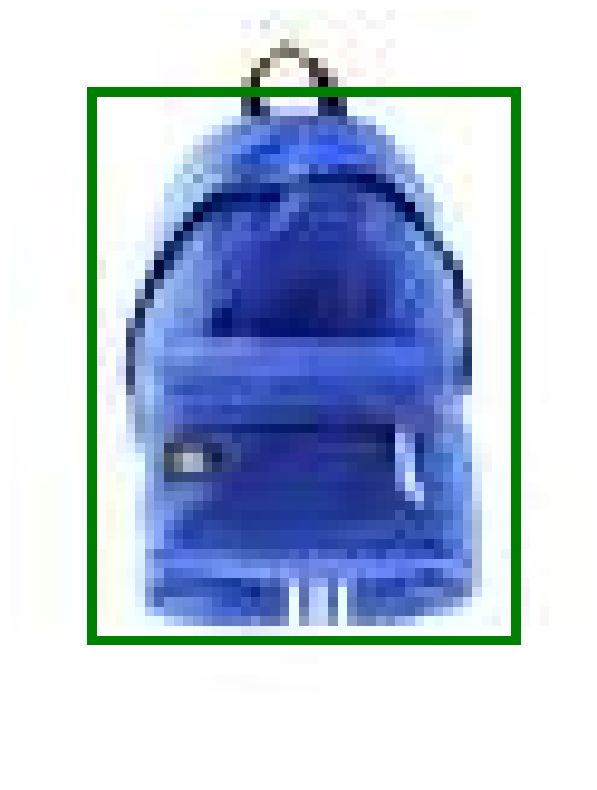

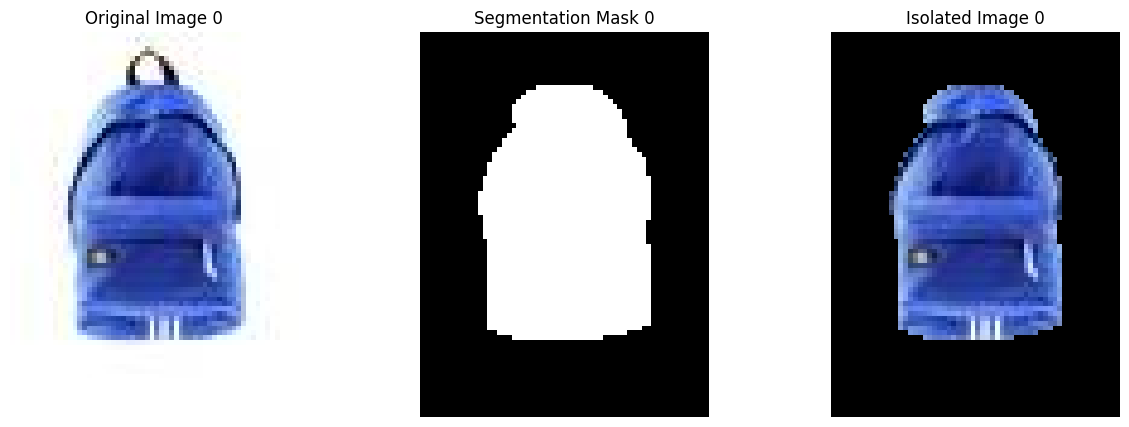

Segmentation complete for 2249.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2602.jpg: 640x480 1 dress, 32.3ms
Speed: 2.5ms preprocess, 32.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

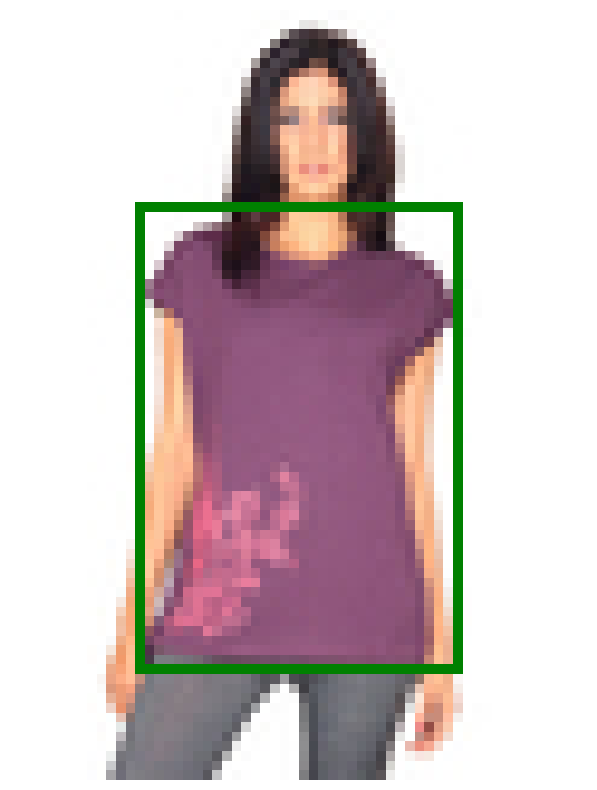

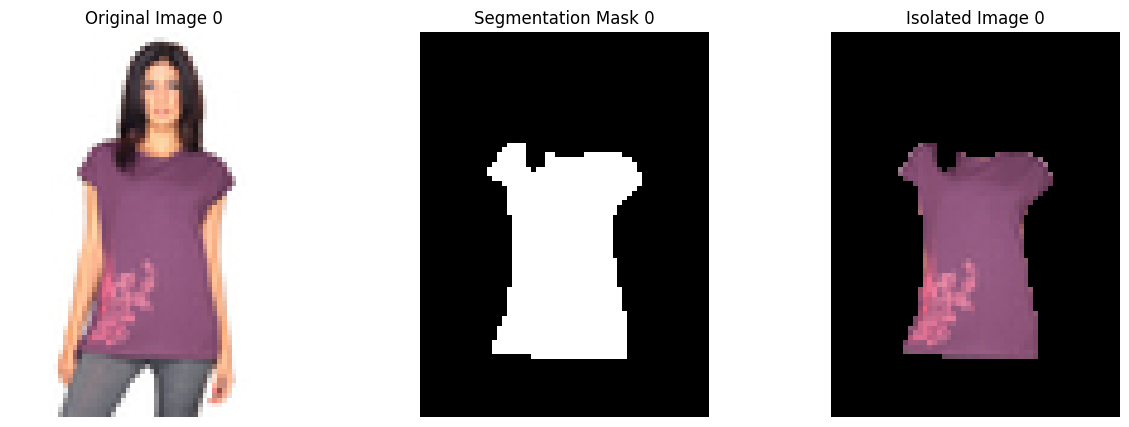

Segmentation complete for 2602.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2956.jpg: 640x480 1 dress, 31.2ms
Speed: 2.6ms preprocess, 31.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

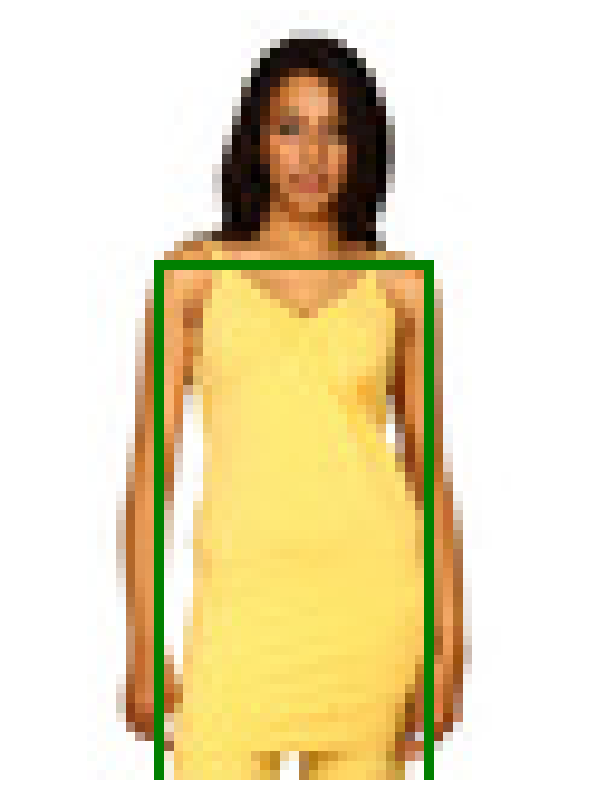

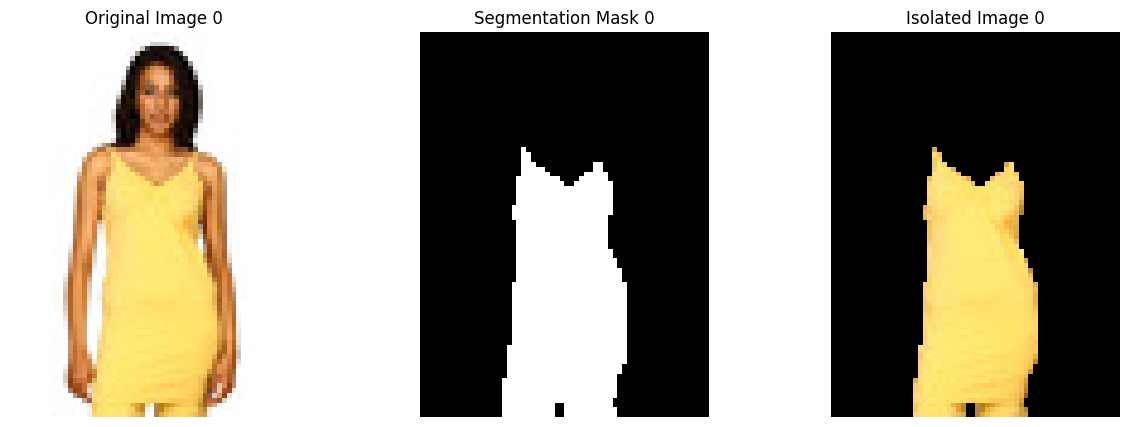

Segmentation complete for 2956.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/40999.jpg: 640x480 1 jacket, 38.1ms
Speed: 2.4ms preprocess, 38.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

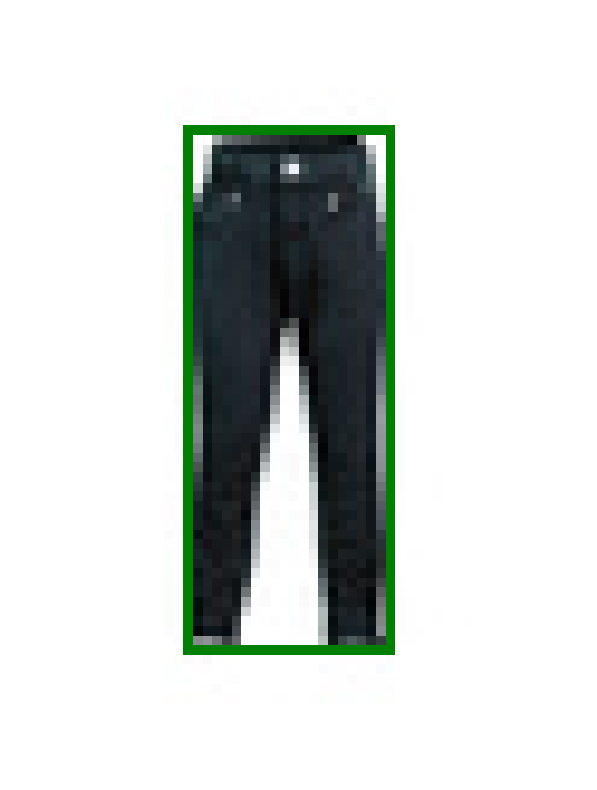

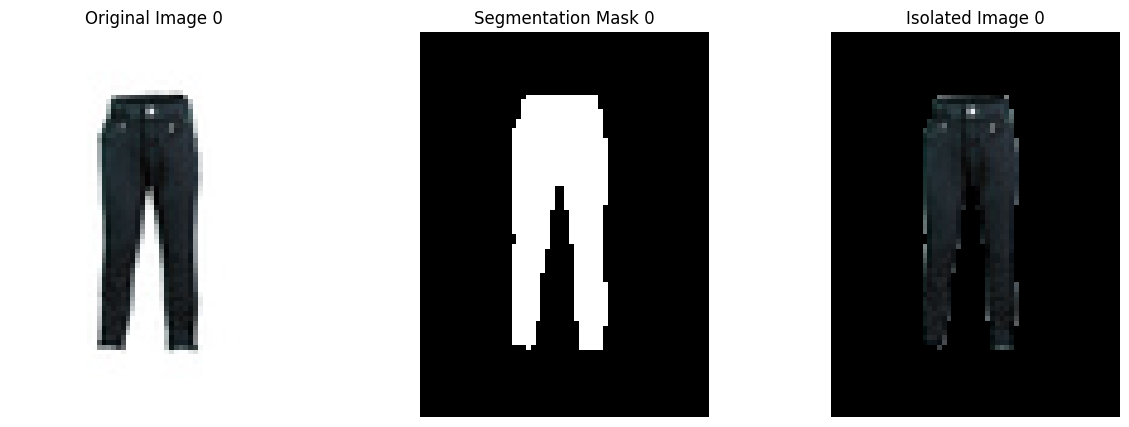

Segmentation complete for 40999.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/51982.jpg: 640x480 1 dress, 31.2ms
Speed: 2.5ms preprocess, 31.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

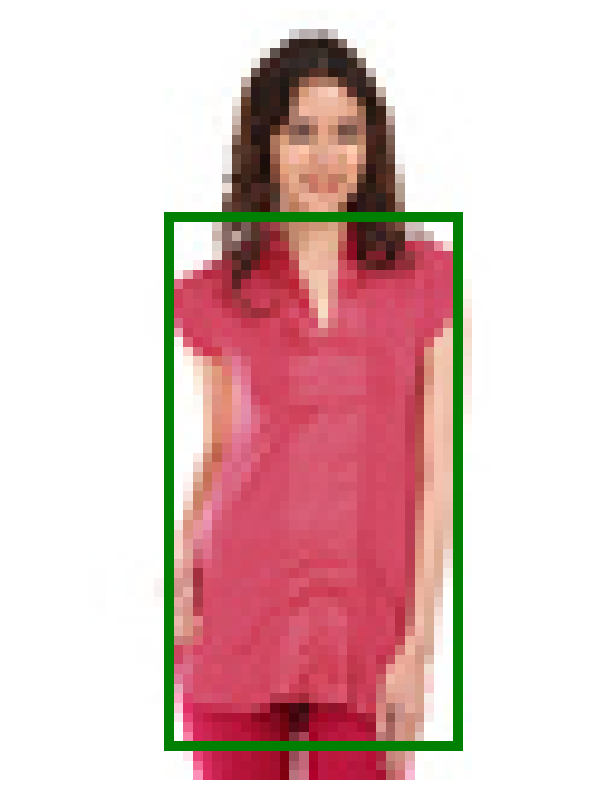

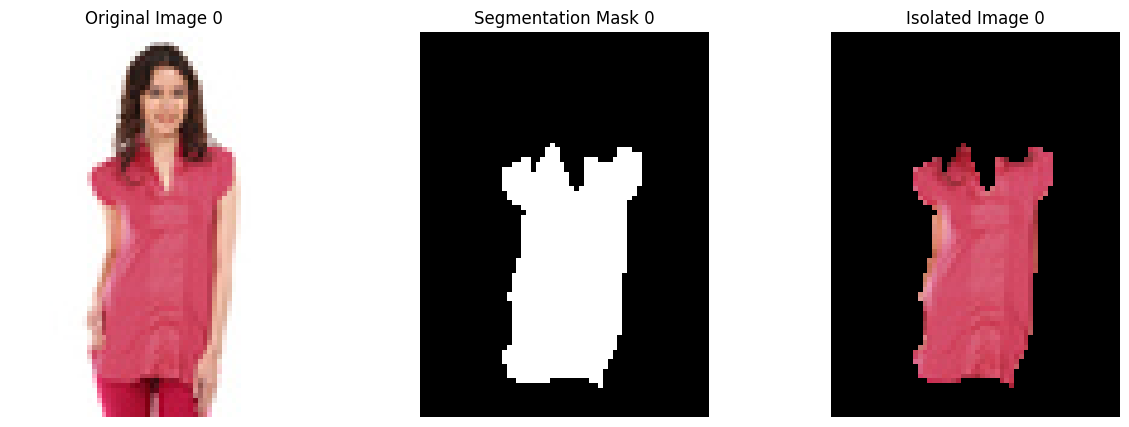

Segmentation complete for 51982.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5780.jpg: 640x480 1 dress, 30.1ms
Speed: 3.0ms preprocess, 30.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255

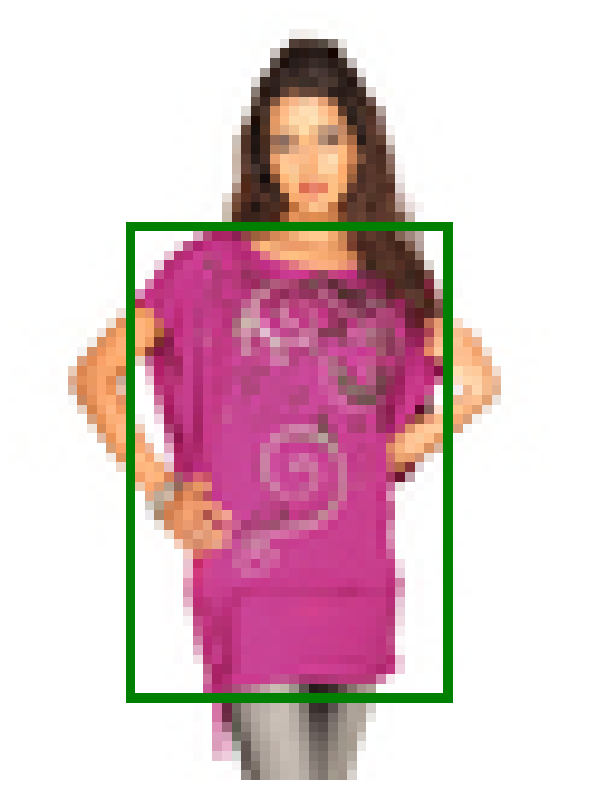

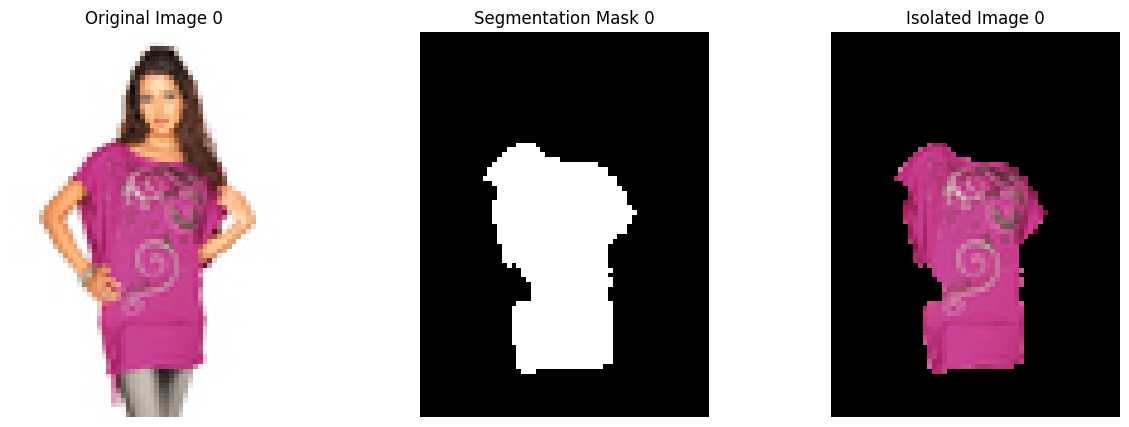

Segmentation complete for 5780.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5854.jpg: 640x480 1 dress, 32.7ms
Speed: 4.1ms preprocess, 32.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

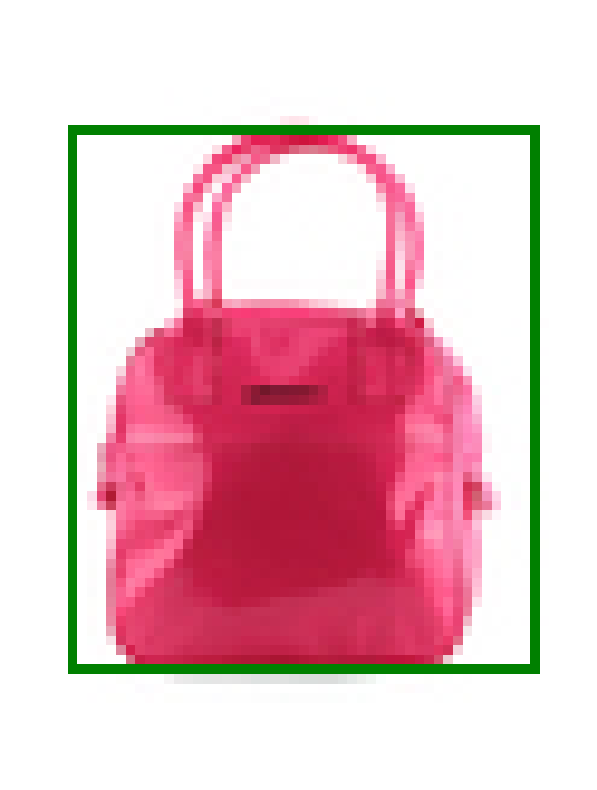

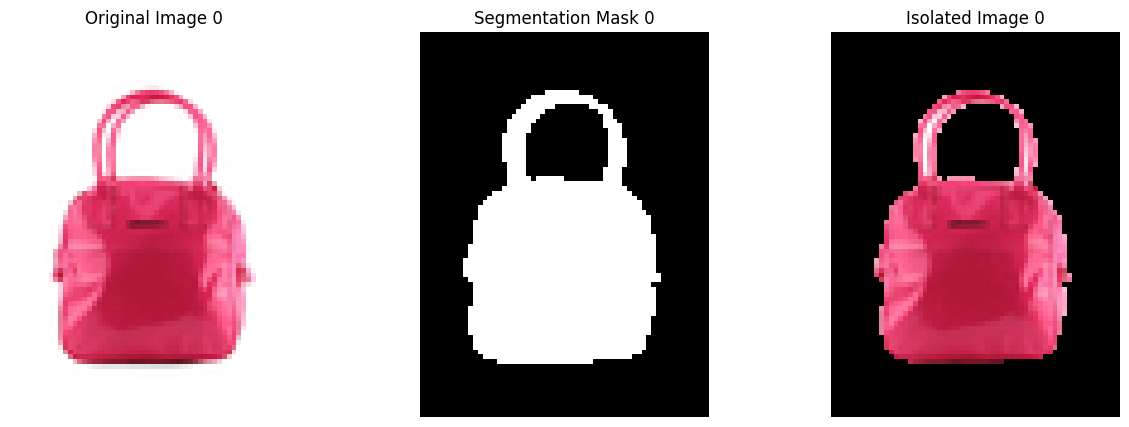

Segmentation complete for 5854.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1563.jpg: 640x480 1 dress, 30.0ms
Speed: 4.5ms preprocess, 30.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

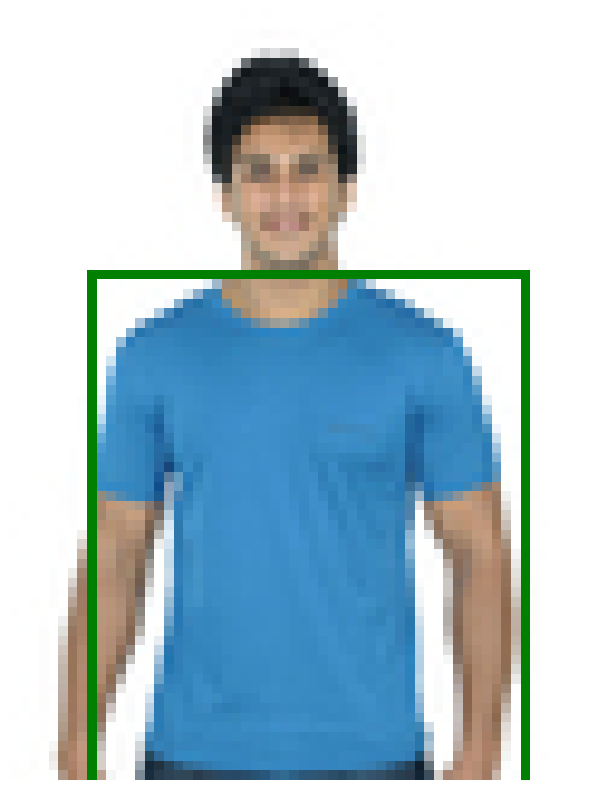

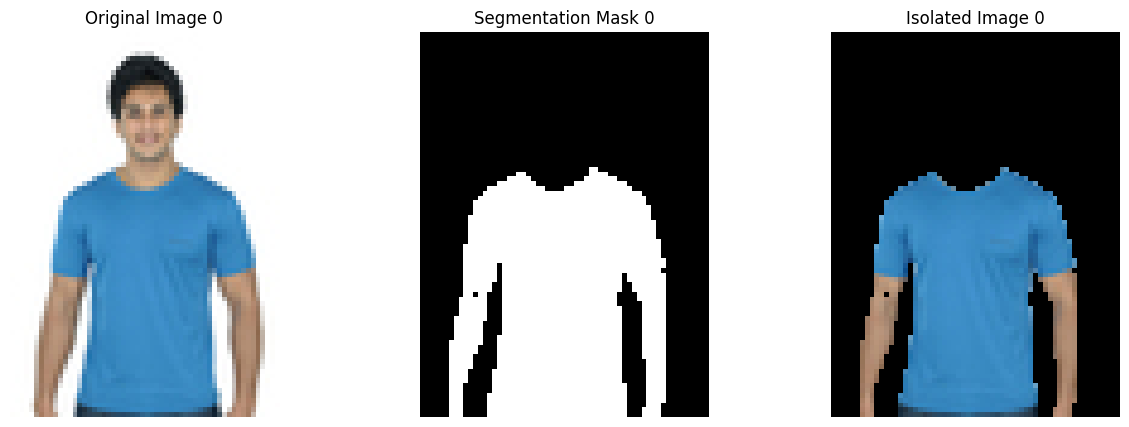

Segmentation complete for 1563.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg: 640x480 1 jacket, 35.1ms
Speed: 2.5ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255

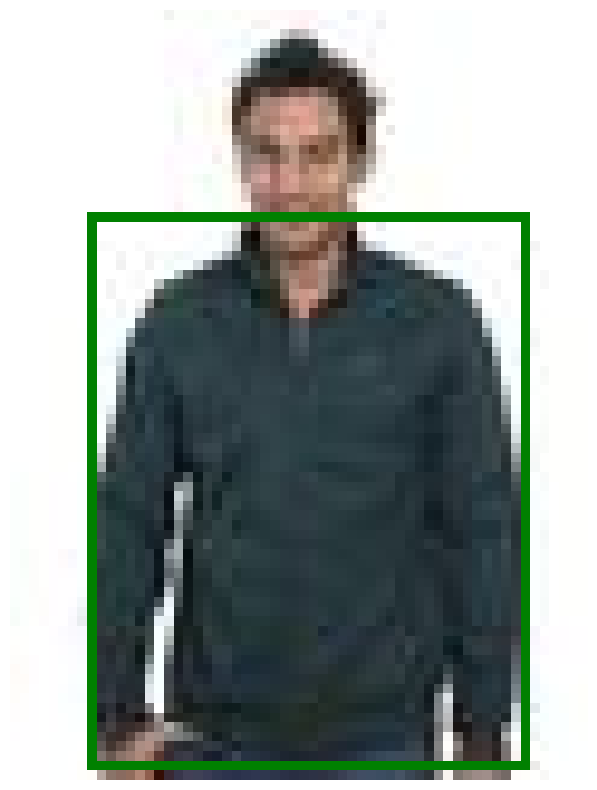

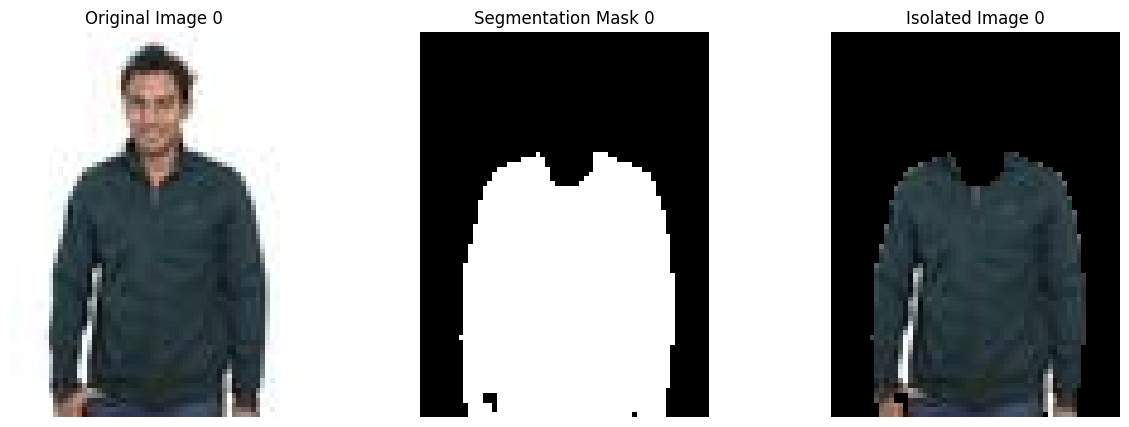

Segmentation complete for 2031.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1539.jpg: 640x480 1 dress, 33.6ms
Speed: 2.7ms preprocess, 33.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

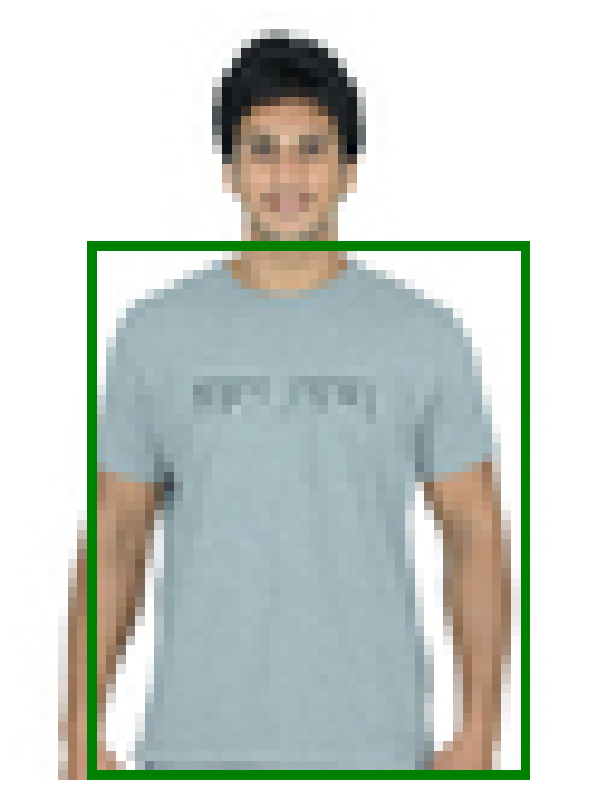

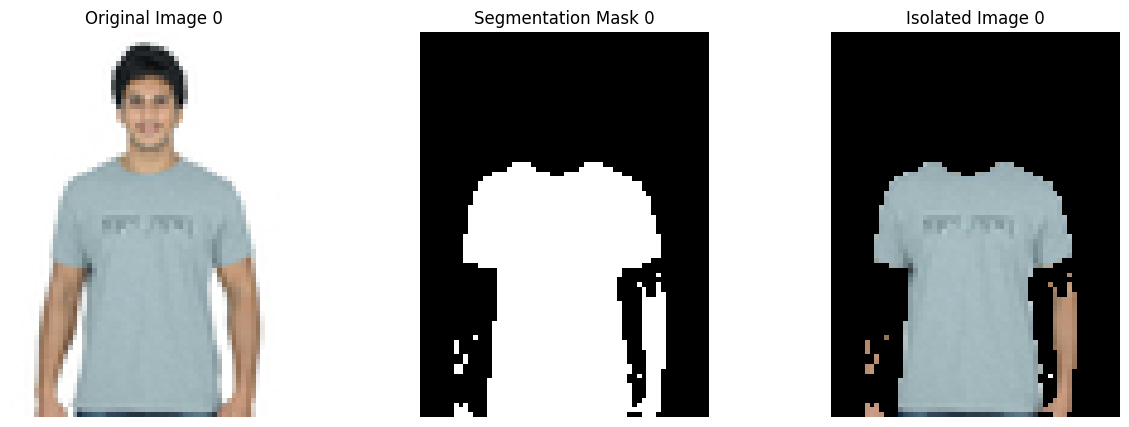

Segmentation complete for 1539.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg: 640x480 1 jacket, 32.5ms
Speed: 2.5ms preprocess, 32.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255

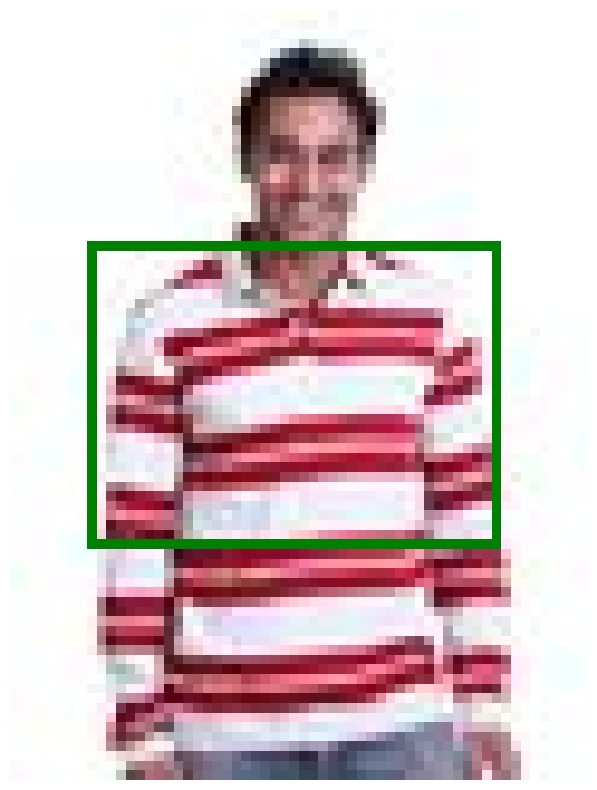

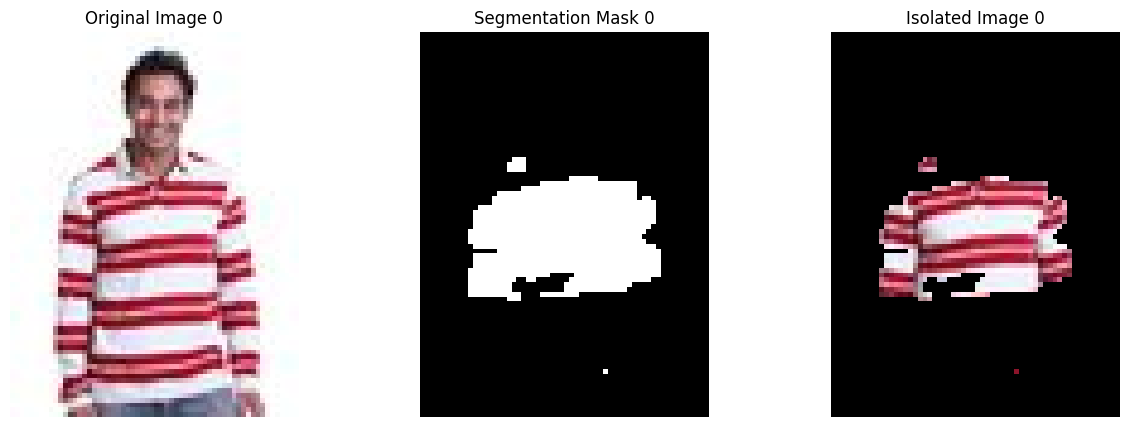

Segmentation complete for 2154.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/33589.jpg: 640x480 1 shirt, 1 pants, 31.8ms
Speed: 2.7ms preprocess, 31.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        

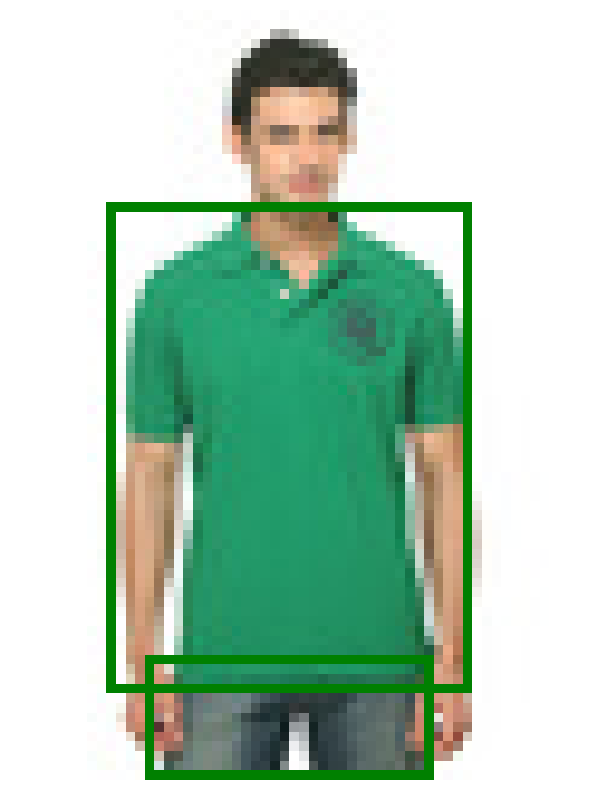

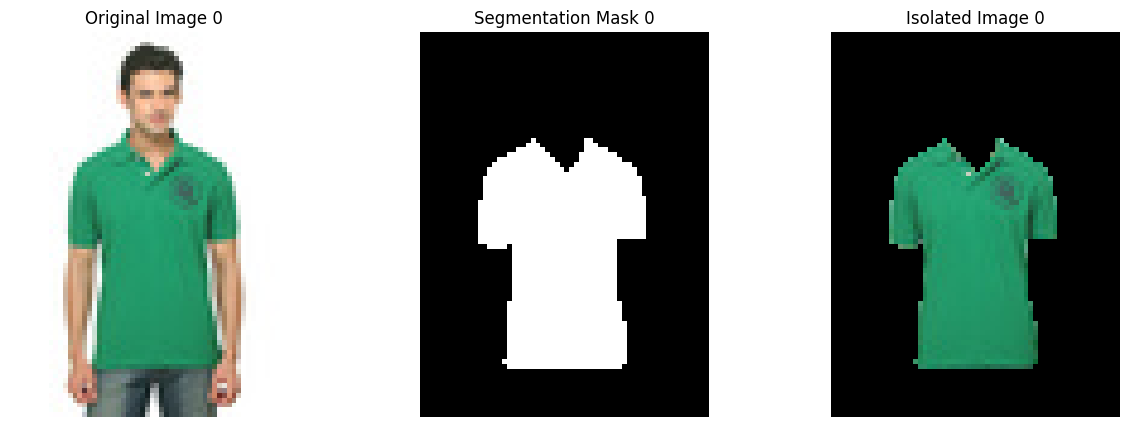

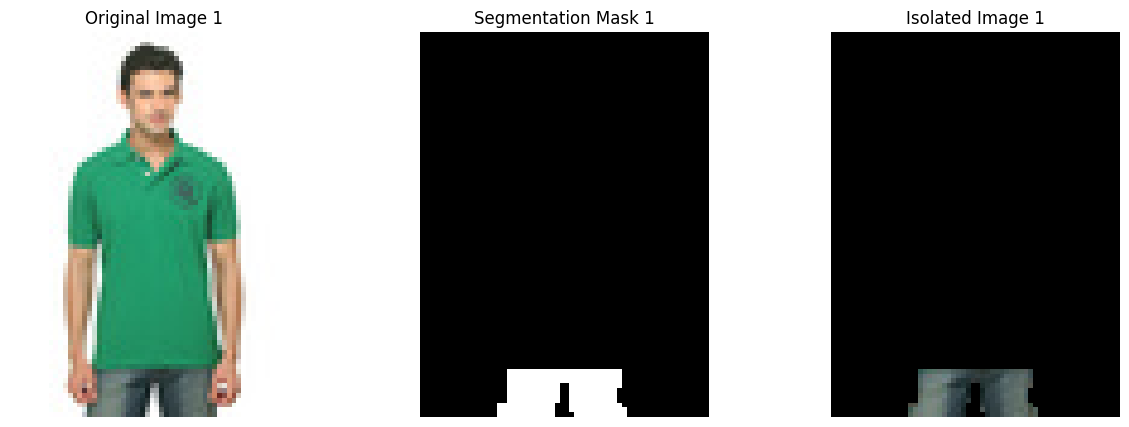

Segmentation complete for 33589.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1533.jpg: 640x480 2 dresss, 33.6ms
Speed: 2.9ms preprocess, 33.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

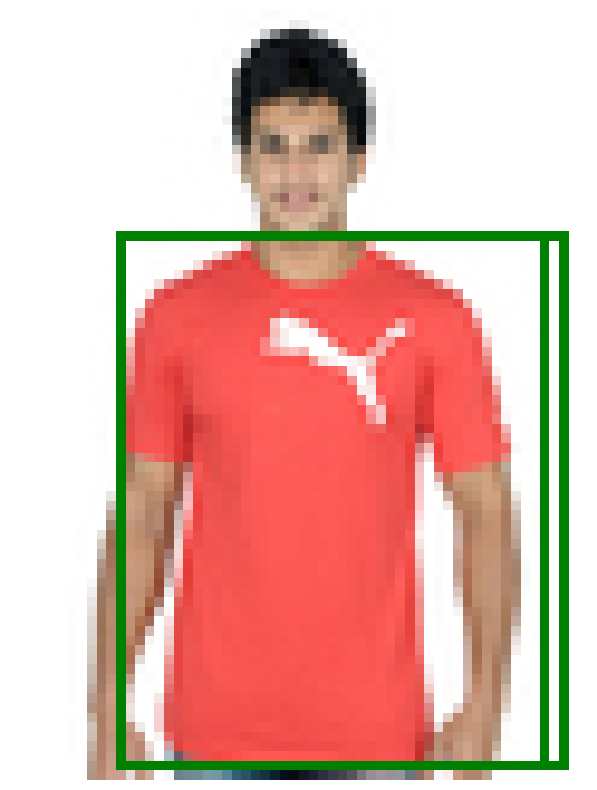

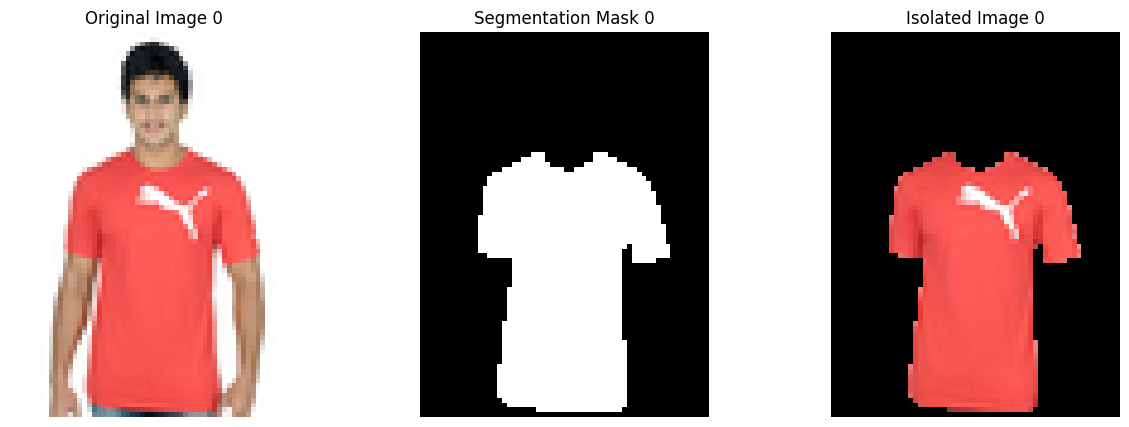

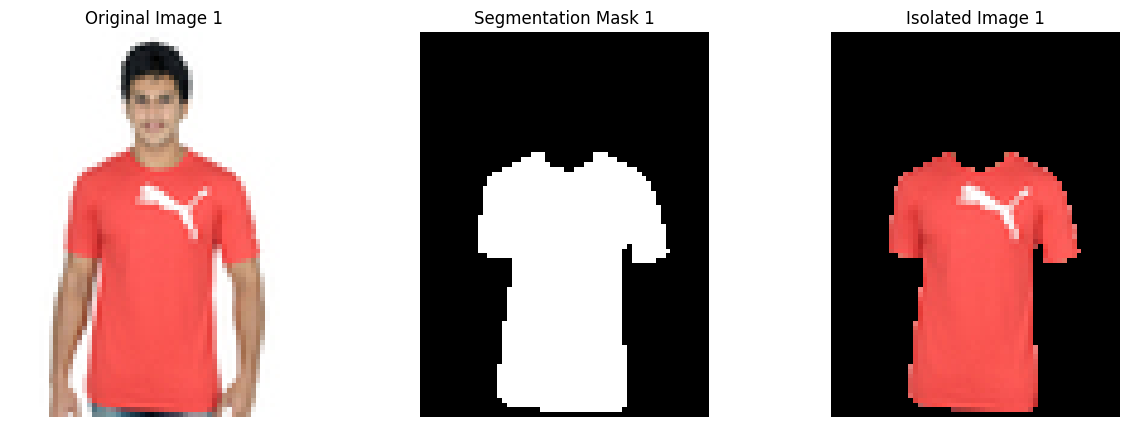

Segmentation complete for 1533.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1992.jpg: 640x480 1 shirt, 1 pants, 42.9ms
Speed: 2.8ms preprocess, 42.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [

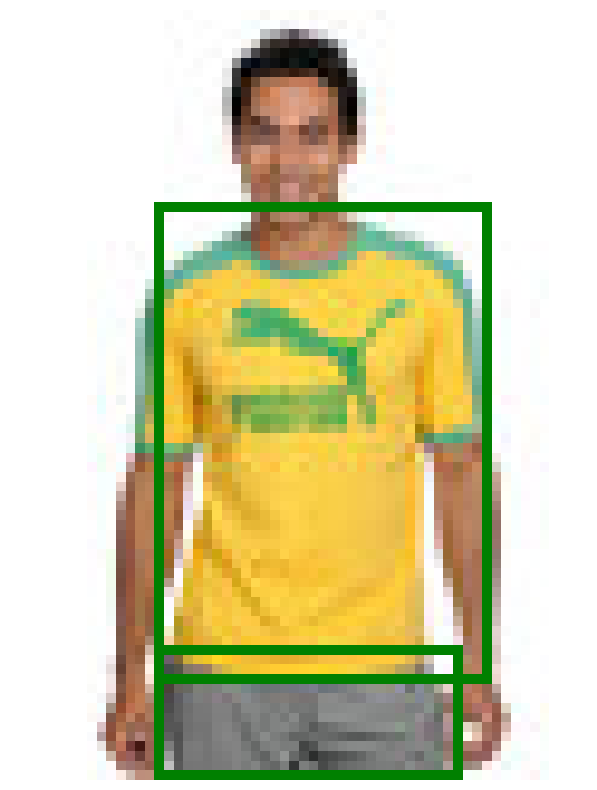

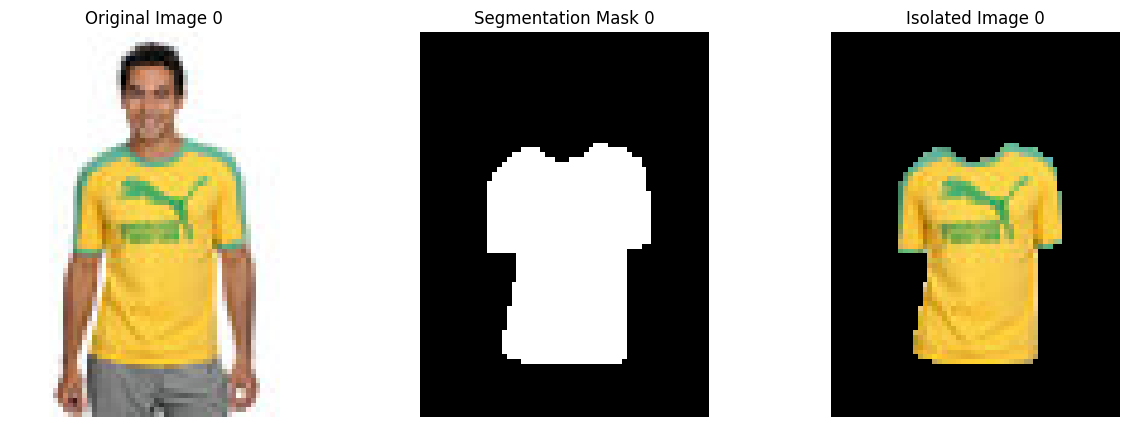

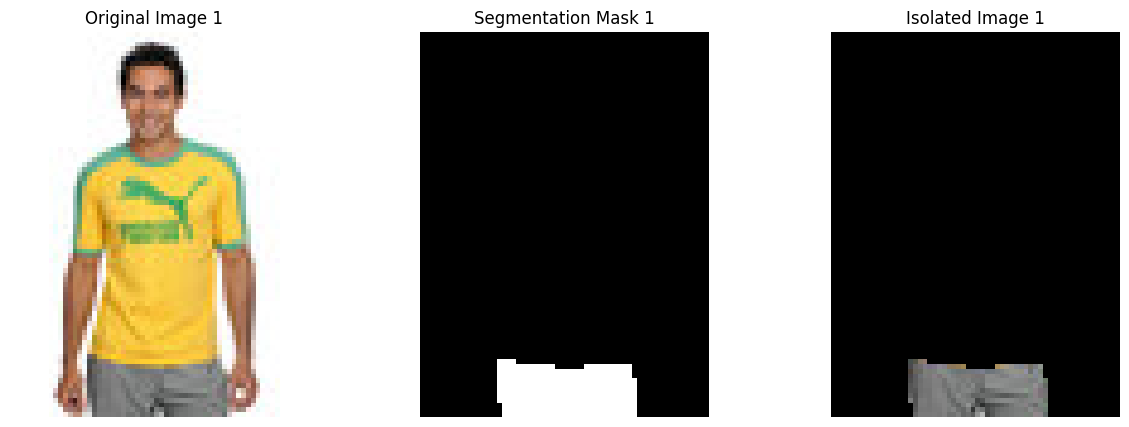

Segmentation complete for 1992.jpg

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2024.jpg: 640x480 (no detections), 34.3ms
Speed: 2.6ms preprocess, 34.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'sunglass', 1: 'hat', 2: 'jacket', 3: 'shirt', 4: 'pants', 5: 'shorts', 6: 'skirt', 7: 'dress', 8: 'bag', 9: 'shoe'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [2

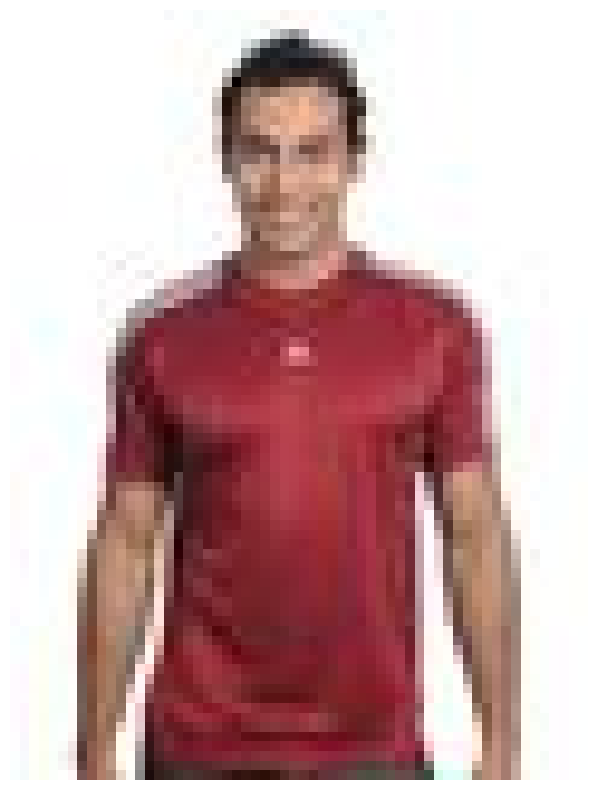

RuntimeError: cannot reshape tensor of 0 elements into shape [0, -1, 256, 256] because the unspecified dimension size -1 can be any value and is ambiguous

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import torch
!pip install ultralytics
from ultralytics import YOLO

# Install Segment Anything library from GitHub
!pip install -q git+https://github.com/facebookresearch/segment-anything.git
from segment_anything import sam_model_registry, SamPredictor

# Define paths
base_path = "/content/drive/MyDrive/object_detection"
new_base_path = '/content/drive/MyDrive/new_fashion_dataset'
new_images_path = os.path.join(new_base_path, 'new_images')

# Load the trained YOLO model
runs_path = os.path.join(base_path, 'runs', 'detect')
weights_save_path = os.path.join(runs_path, 'train7', 'weights')
best_weights_path = os.path.join(weights_save_path, "best.pt")

model = YOLO(best_weights_path)

# Load the SAM model
sam_model_path = os.path.join(base_path, "object_detection_yolov8/sam_vit_h_4b8939.pth")
sam = sam_model_registry["vit_h"](checkpoint=sam_model_path).to(device=torch.device('cuda:0'))
mask_predictor = SamPredictor(sam)

# Iterate over each image in the new_images_path directory
for image_file in os.listdir(new_images_path):
    sample_image_path = os.path.join(new_images_path, image_file)

    # Load the image
    image = Image.open(sample_image_path).convert('RGB')
    image_rgb = np.array(image)
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    # Perform inference with YOLO
    results = model(sample_image_path)
    print(results[0])

    predicted_boxes = []
    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            confidence = box.conf[0].item()         # Get confidence score
            class_id = int(box.cls[0])              # Get class id
            label = model.names[class_id]           # Get label for class id

            # Draw bounding box on the image
            draw.rectangle([x1, y1, x2, y2], outline="green", width=1)
            # Store the box coordinates for SAM processing
            predicted_boxes.append([x1, y1, x2, y2])

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Transform the YOLOv8 predicted boxes to match input format expected by SAM model
    predicted_boxes_tensor = torch.tensor(predicted_boxes, dtype=torch.float32).to('cuda')
    transformed_boxes = mask_predictor.transform.apply_boxes_torch(predicted_boxes_tensor, image_bgr.shape[:2])

    # Set the image for SAM prediction
    mask_predictor.set_image(image_bgr)

    # Run SAM model on all the boxes
    masks, scores, logits = mask_predictor.predict_torch(
        boxes=transformed_boxes.to('cuda'),
        multimask_output=False,
        point_coords=None,
        point_labels=None
    )

    # Visualize each mask separately
    for i, mask in enumerate(masks):
        mask = mask[0].cpu().numpy().astype(np.uint8)  # Ensure mask is uint8 type

        # Multiply the mask by the original image to isolate the object
        isolated_image = image_rgb * mask[:, :, np.newaxis]

        # Visualize the original image, mask, and isolated image
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"Original Image {i}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Segmentation Mask {i}")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(isolated_image)
        plt.title(f"Isolated Image {i}")
        plt.axis('off')

        plt.show()

    print(f"Segmentation complete for {image_file}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor
from sklearn.cluster import KMeans

# CSS3 color dictionary
css3_colors = {
    'aliceblue': (240, 248, 255), 'antiquewhite': (250, 235, 215), 'aqua': (0, 255, 255),
    'aquamarine': (127, 255, 212), 'azure': (240, 255, 255), 'beige': (245, 245, 220),
    'bisque': (255, 228, 196), 'black': (0, 0, 0), 'blanchedalmond': (255, 235, 205),
    'blue': (0, 0, 255), 'blueviolet': (138, 43, 226), 'brown': (165, 42, 42),
    'burlywood': (222, 184, 135), 'cadetblue': (95, 158, 160), 'chartreuse': (127, 255, 0),
    'chocolate': (210, 105, 30), 'coral': (255, 127, 80), 'cornflowerblue': (100, 149, 237),
    'cornsilk': (255, 248, 220), 'crimson': (220, 20, 60), 'cyan': (0, 255, 255),
    'darkblue': (0, 0, 139), 'darkcyan': (0, 139, 139), 'darkgoldenrod': (184, 134, 11),
    'darkgray': (169, 169, 169), 'darkgreen': (0, 100, 0), 'darkkhaki': (189, 183, 107),
    'darkmagenta': (139, 0, 139), 'darkolivegreen': (85, 107, 47), 'darkorange': (255, 140, 0),
    'darkorchid': (153, 50, 204), 'darkred': (139, 0, 0), 'darksalmon': (233, 150, 122),
    'darkseagreen': (143, 188, 143), 'darkslateblue': (72, 61, 139), 'darkslategray': (47, 79, 79),
    'darkturquoise': (0, 206, 209), 'darkviolet': (148, 0, 211), 'deeppink': (255, 20, 147),
    'deepskyblue': (0, 191, 255), 'dimgray': (105, 105, 105), 'dodgerblue': (30, 144, 255),
    'firebrick': (178, 34, 34), 'floralwhite': (255, 250, 240), 'forestgreen': (34, 139, 34),
    'fuchsia': (255, 0, 255), 'gainsboro': (220, 220, 220), 'ghostwhite': (248, 248, 255),
    'gold': (255, 215, 0), 'goldenrod': (218, 165, 32), 'gray': (128, 128, 128),
    'green': (0, 128, 0), 'greenyellow': (173, 255, 47), 'honeydew': (240, 255, 240),
    'hotpink': (255, 105, 180), 'indianred': (205, 92, 92), 'indigo': (75, 0, 130),
    'ivory': (255, 255, 240), 'khaki': (240, 230, 140), 'lavender': (230, 230, 250),
    'lavenderblush': (255, 240, 245), 'lawngreen': (124, 252, 0), 'lemonchiffon': (255, 250, 205),
    'lightblue': (173, 216, 230), 'lightcoral': (240, 128, 128), 'lightcyan': (224, 255, 255),
    'lightgoldenrodyellow': (250, 250, 210), 'lightgreen': (144, 238, 144), 'lightgrey': (211, 211, 211),
    'lightpink': (255, 182, 193), 'lightsalmon': (255, 160, 122), 'lightseagreen': (32, 178, 170),
    'lightskyblue': (135, 206, 250), 'lightslategray': (119, 136, 153), 'lightsteelblue': (176, 196, 222),
    'lightyellow': (255, 255, 224), 'lime': (0, 255, 0), 'limegreen': (50, 205, 50),
    'linen': (250, 240, 230), 'magenta': (255, 0, 255), 'maroon': (128, 0, 0),
    'mediumaquamarine': (102, 205, 170), 'mediumblue': (0, 0, 205), 'mediumorchid': (186, 85, 211),
    'mediumpurple': (147, 112, 219), 'mediumseagreen': (60, 179, 113), 'mediumslateblue': (123, 104, 238),
    'mediumspringgreen': (0, 250, 154), 'mediumturquoise': (72, 209, 204), 'mediumvioletred': (199, 21, 133),
    'midnightblue': (25, 25, 112), 'mintcream': (245, 255, 250), 'mistyrose': (255, 228, 225),
    'moccasin': (255, 228, 181), 'navajowhite': (255, 222, 173), 'navy': (0, 0, 128),
    'oldlace': (253, 245, 230), 'olive': (128, 128, 0), 'olivedrab': (107, 142, 35),
    'orange': (255, 165, 0), 'orangered': (255, 69, 0), 'orchid': (218, 112, 214),
    'palegoldenrod': (238, 232, 170), 'palegreen': (152, 251, 152), 'paleturquoise': (175, 238, 238),
    'palevioletred': (219, 112, 147), 'papayawhip': (255, 239, 213), 'peachpuff': (255, 218, 185),
    'peru': (205, 133, 63), 'pink': (255, 192, 203), 'plum': (221, 160, 221),
    'powderblue': (176, 224, 230), 'purple': (128, 0, 128), 'rebeccapurple': (102, 51, 153),
    'red': (255, 0, 0), 'rosybrown': (188, 143, 143), 'royalblue': (65, 105, 225),
    'saddlebrown': (139, 69, 19), 'salmon': (250, 128, 114), 'sandybrown': (244, 164, 96),
    'seagreen': (46, 139, 87), 'seashell': (255, 245, 238), 'sienna': (160, 82, 45),
    'silver': (192, 192, 192), 'skyblue': (135, 206, 235), 'slateblue': (106, 90, 205),
    'slategray': (112, 128, 144), 'snow': (255, 250, 250), 'springgreen': (0, 255, 127),
    'steelblue': (70, 130, 180), 'tan': (210, 180, 140), 'teal': (0, 128, 128),
    'thistle': (216, 191, 216), 'tomato': (255, 99, 71), 'turquoise': (64, 224, 208),
    'violet': (238, 130, 238), 'wheat': (245, 222, 179), 'white': (255, 255, 255),
    'whitesmoke': (245, 245, 245), 'yellow': (255, 255, 0), 'yellowgreen': (154, 205, 50)
}

# Function to find the closest color name from the CSS3 color dictionary
def closest_color(requested_color):
    min_diff = float('inf')
    closest_color_name = None
    for color_name, rgb in css3_colors.items():
        diff = np.sqrt(np.sum((np.array(rgb) - np.array(requested_color)) ** 2))
        if diff < min_diff:
            min_diff = diff
            closest_color_name = color_name
    return closest_color_name

# KMeans clustering function
def kmeans_clustering(image, n_clusters=3):
    pixels = image.reshape(-1, 4)
    pixels = pixels[pixels[:, 3] > 0]
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels[:, :3])
    cluster_centers = kmeans.cluster_centers_
    cluster_centers = (cluster_centers * 255).astype(int)
    labels = kmeans.labels_
    return cluster_centers, labels

# Function to process each segmented patch to find the dominant color
def process_segmented_patch(image):
    cluster_centers, labels = kmeans_clustering(image)
    labels = labels.flatten()
    counts = np.bincount(labels.astype(int))

    total_pixels = len(labels)
    percentages = (counts / total_pixels) * 100

    max_count_idx = np.argmax(percentages)
    dominant_color = cluster_centers[max_count_idx]
    dominant_color_name = closest_color(dominant_color[:3])

    return dominant_color_name, percentages, cluster_centers, counts, dominant_color

# Function to process each image and perform object detection, segmentation, and color detection
def process_image(image_path, save_base_path):
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_rgb = np.array(image)
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    image_dir = os.path.join(save_base_path, f"{image_name}")
    os.makedirs(image_dir, exist_ok=True)

    # Perform inference with YOLO
    results = model(image_path)

    detected_items = []
    crop_counter = 0
    predicted_boxes = []
    crop_dirs = []

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            confidence = box.conf[0].item()         # Get confidence score
            class_id = int(box.cls[0])              # Get class id
            label = model.names[class_id]           # Get label for class id

            detected_items.append({
                'label': label,
                'coordinates': (x1, y1, x2, y2),
                'confidence': confidence
            })

            cropped_dir = os.path.join(image_dir, f"{label}-{confidence:.2f}-{crop_counter}")
            os.makedirs(cropped_dir, exist_ok=True)
            crop_dirs.append(cropped_dir)

            draw = ImageDraw.Draw(image)
            draw.rectangle([x1, y1, x2, y2], outline="green", width=1)
            # draw.text((x1, y1 - 10), f"{label} {confidence:.2f}", fill="green", font=ImageFont.load_default())

            cropped_filename = os.path.join(cropped_dir, "cropped.jpg")
            cropped_image = image.crop((x1, y1, x2, y2))
            cropped_image.save(cropped_filename)
            predicted_boxes.append([x1, y1, x2, y2])
            crop_counter += 1

    print(f"Cropping complete for {image_path}.")

    # Check if there are any bounding boxes detected
    if len(predicted_boxes) == 0:
        print(f"No objects detected in {image_path}. Skipping segmentation.")
        return  # Skip to the next image if no objects were detected

    # Segmentation with SAM
    predicted_boxes_tensor = torch.tensor(predicted_boxes, dtype=torch.float32).to('cuda')
    transformed_boxes = mask_predictor.transform.apply_boxes_torch(predicted_boxes_tensor, image_bgr.shape[:2])

    mask_predictor.set_image(image_bgr)
    masks, scores, logits = mask_predictor.predict_torch(
        boxes=transformed_boxes.to('cuda'),
        multimask_output=False,
        point_coords=None,
        point_labels=None
    )

    # Save and visualize masks
    for j, mask in enumerate(masks):
        mask = mask[0].cpu().numpy().astype(np.uint8)

        mask_image = Image.fromarray(mask * 255)
        mask_filename = os.path.join(crop_dirs[j], "mask.png")
        mask_image.save(mask_filename)

        isolated_image = image_rgb * mask[:, :, np.newaxis]
        isolated_image_pil = Image.fromarray(isolated_image)
        isolated_filename = os.path.join(crop_dirs[j], "isolated.png")
        isolated_image_pil.save(isolated_filename)

        coords = np.column_stack(np.where(mask > 0))
        if coords.size == 0:
            print(f"No object found for mask {j} in {image_path}")
            continue
        y1, x1 = coords.min(axis=0)
        y2, x2 = coords.max(axis=0)

        isolated_cropped_image = isolated_image[y1:y2+1, x1:x2+1]
        isolated_cropped_image_rgba = np.zeros((y2 - y1 + 1, x2 - x1 + 1, 4), dtype=np.uint8)
        isolated_cropped_image_rgba[..., :3] = isolated_cropped_image
        isolated_cropped_image_rgba[..., 3] = mask[y1:y2+1, x1:x2+1] * 255

        segmented_cropped_filename = os.path.join(crop_dirs[j], "segmented_cropped.png")
        isolated_cropped_image_rgba_pil = Image.fromarray(isolated_cropped_image_rgba, 'RGBA')
        isolated_cropped_image_rgba_pil.save(segmented_cropped_filename)

        # Process color information
        segmented_cropped_image = plt.imread(segmented_cropped_filename)
        print(f"Processing color for segmented cropped image: {segmented_cropped_filename}")
        dominant_color_name, percentages, cluster_centers, counts, dominant_color = process_segmented_patch(segmented_cropped_image)
        text_filename = os.path.join(crop_dirs[j], "color.txt")
        with open(text_filename, 'w') as f:
            f.write(f"A photo of a {dominant_color_name} (RGB: {dominant_color.tolist()}) {label}.\n")
            f.write(f"Final Colors: {cluster_centers.tolist()}\n")
            for idx, color_center in enumerate(cluster_centers):
                color_name = closest_color(color_center[:3])
                f.write(f"Color Name: {color_name}, RGB: {color_center.tolist()}\n")
            f.write(f"Counts of cluster pixels: {counts.tolist()}\n")
            f.write(f"Percentages: {percentages.tolist()}\n")
            f.write(f"Dominant Cluster: {np.argmax(counts)}\n")
        print(f"Processed {segmented_cropped_filename} -> {text_filename}")

    print(f"Segmentation complete for {image_path}.")

# Define base paths
base_path = "/content/drive/MyDrive/object_detection"
new_base_path = '/content/drive/MyDrive/new_fashion_dataset/new_images'

# Load the trained YOLO model
yolo_weights_path = os.path.join(base_path, 'runs', 'detect', 'train', 'weights', 'best.pt')
sam_model_path = os.path.join(base_path, "object_detection_yolov8/sam_vit_h_4b8939.pth")
model = YOLO(yolo_weights_path)
sam = sam_model_registry["vit_h"](checkpoint=sam_model_path).to(device=torch.device('cuda:0'))
mask_predictor = SamPredictor(sam)

# Process each image in the new_images_path directory
for image_file in os.listdir(new_base_path):
    sample_image_path = os.path.join(new_base_path, image_file)
    process_image(sample_image_path, new_base_path)


image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2249.jpg: 640x480 1 dress, 46.9ms
Speed: 2.3ms preprocess, 46.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2249.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2249/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


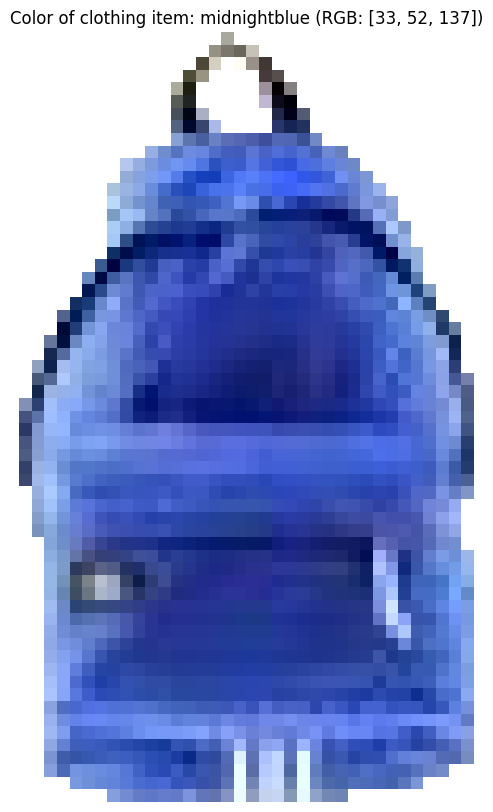

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2249/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2249/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2249.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2602.jpg: 640x480 1 dress, 22.5ms
Speed: 2.5ms preprocess, 22.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2602.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2602/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


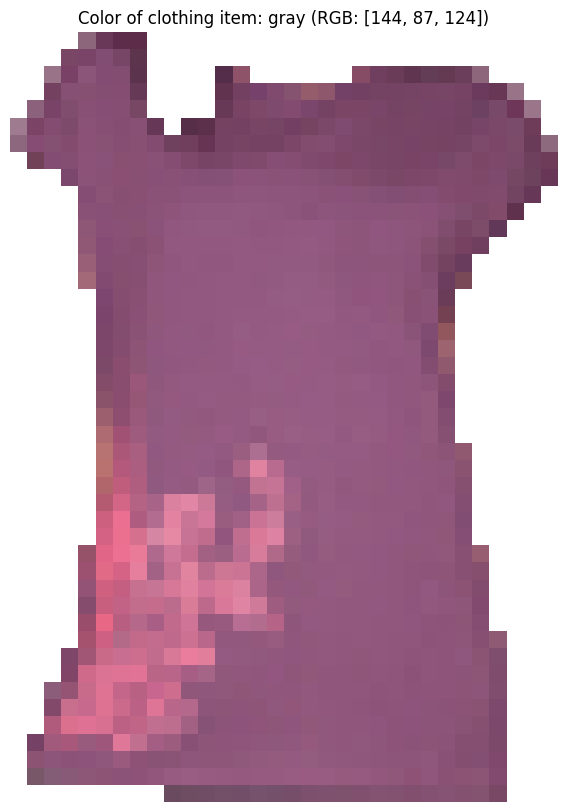

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2602/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2602/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2602.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2956.jpg: 640x480 1 dress, 22.2ms
Speed: 2.7ms preprocess, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2956.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2956/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


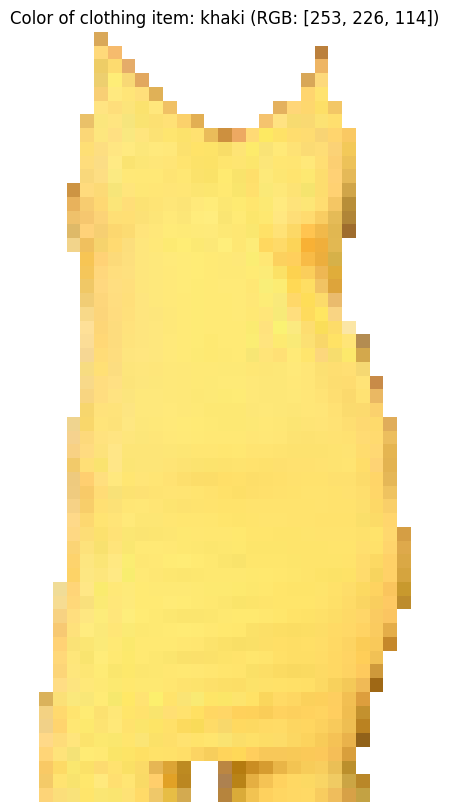

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2956/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2956/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2956.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/40999.jpg: 640x480 1 pants, 21.8ms
Speed: 2.3ms preprocess, 21.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/40999.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/40999/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


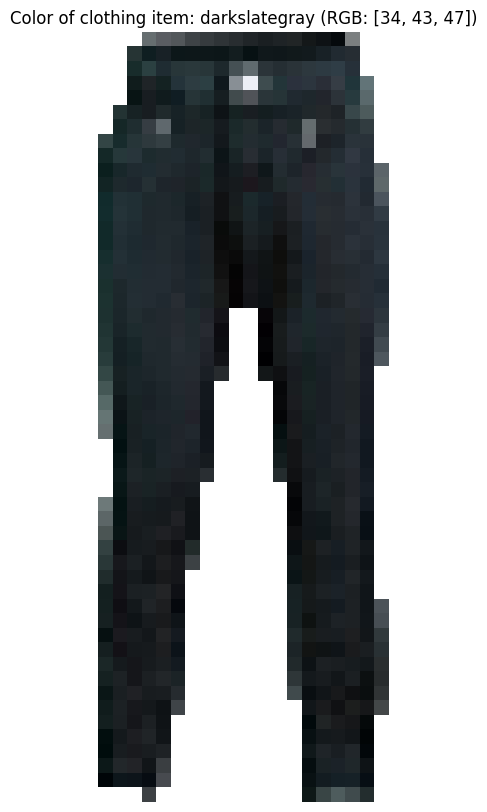

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/40999/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/40999/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/40999.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/51982.jpg: 640x480 1 dress, 23.5ms
Speed: 2.2ms preprocess, 23.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/51982.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/51982/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


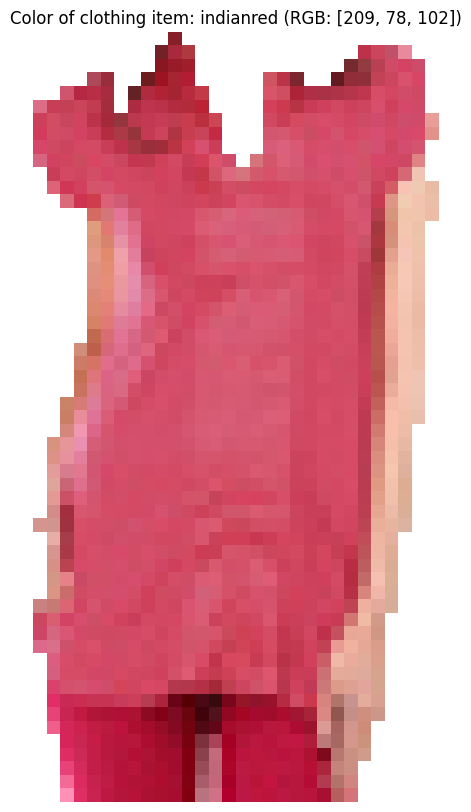

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/51982/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/51982/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/51982.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5780.jpg: 640x480 1 dress, 21.8ms
Speed: 2.3ms preprocess, 21.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/5780.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/5780/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


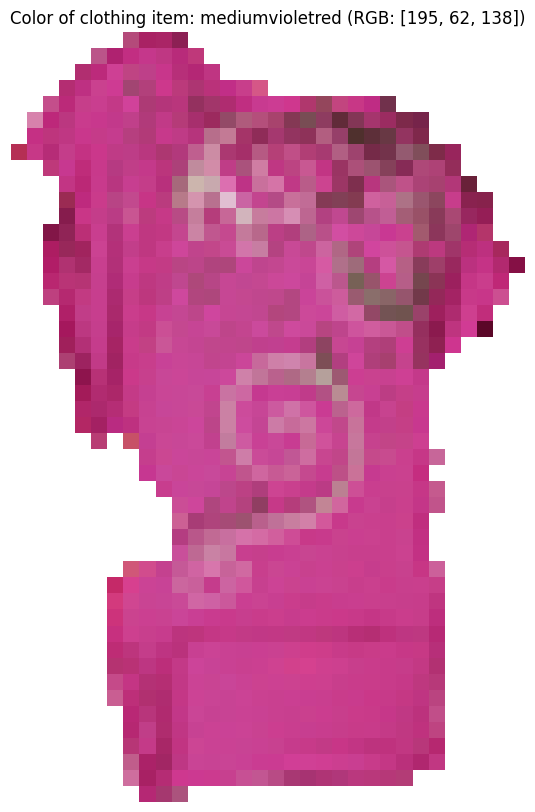

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/5780/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/5780/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/5780.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/5854.jpg: 640x480 1 dress, 22.3ms
Speed: 2.3ms preprocess, 22.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/5854.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/5854/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


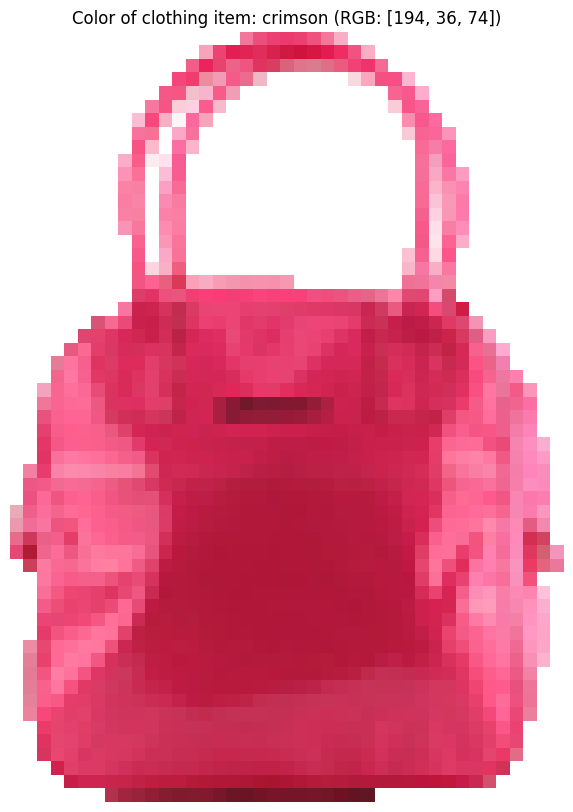

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/5854/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/5854/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/5854.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1563.jpg: 640x480 1 dress, 21.9ms
Speed: 2.5ms preprocess, 21.9ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1563.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/1563/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


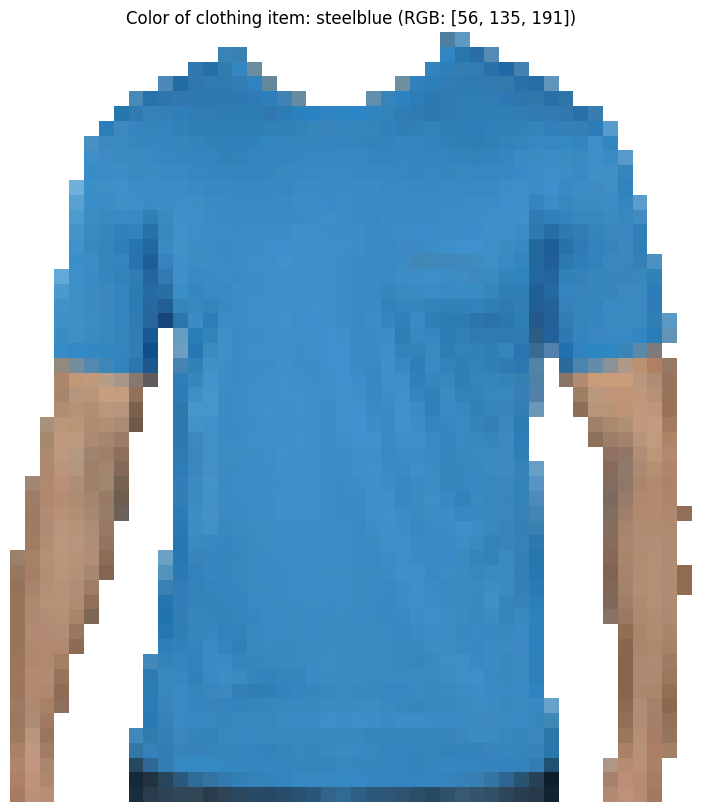

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/1563/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/1563/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1563.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg: 640x480 1 jacket, 1 dress, 22.0ms
Speed: 2.5ms preprocess, 22.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


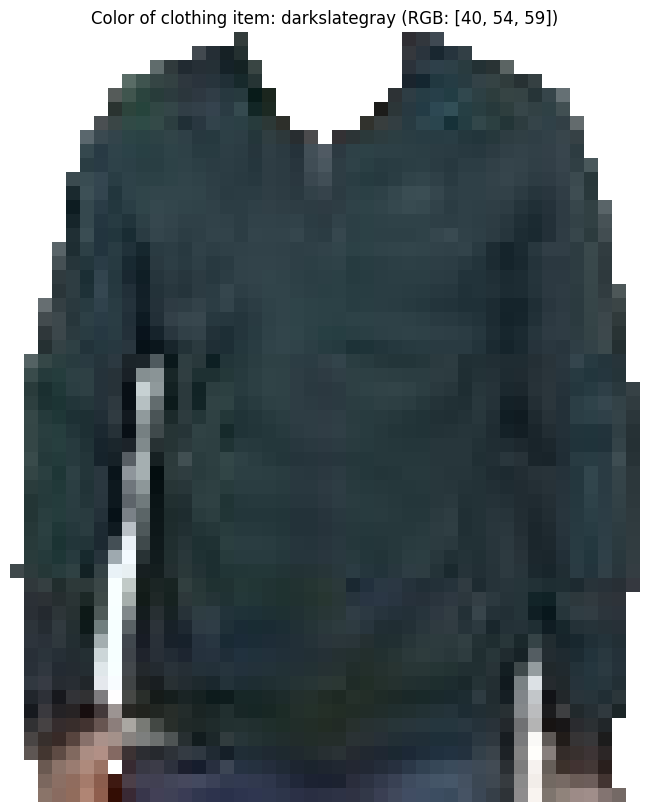

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-1/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


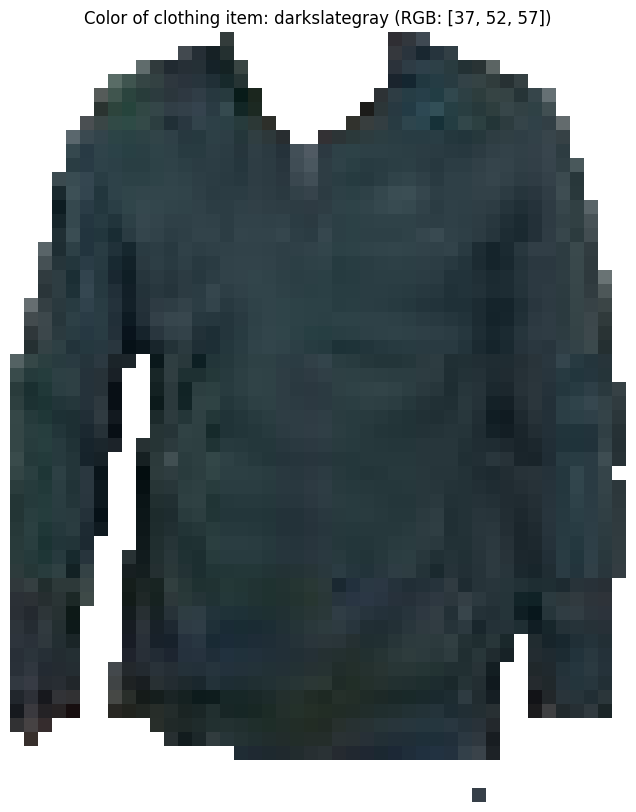

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-1/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2031/object-1/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2031.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1539.jpg: 640x480 1 dress, 22.3ms
Speed: 2.6ms preprocess, 22.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1539.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/1539/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


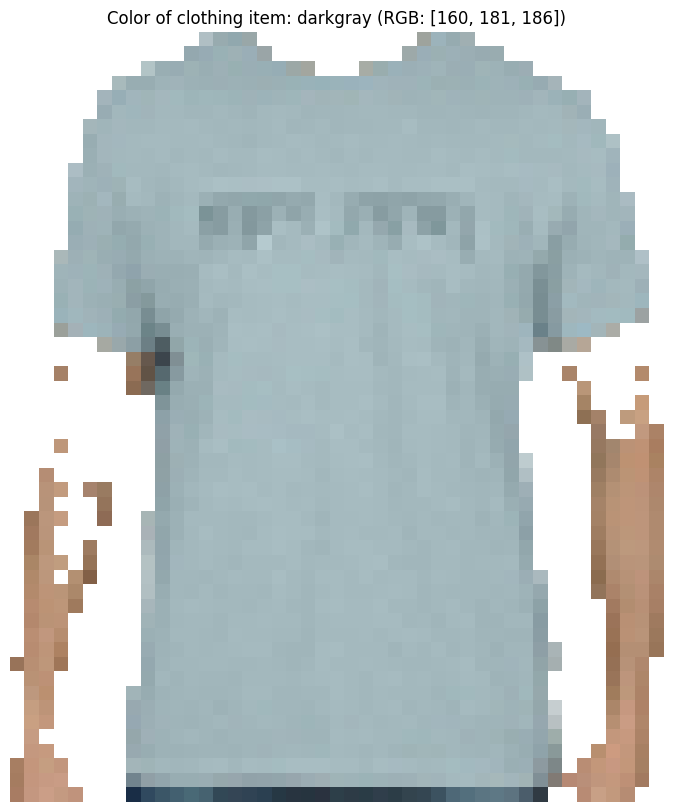

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/1539/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/1539/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1539.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg: 640x480 2 dresss, 21.8ms
Speed: 2.4ms preprocess, 21.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


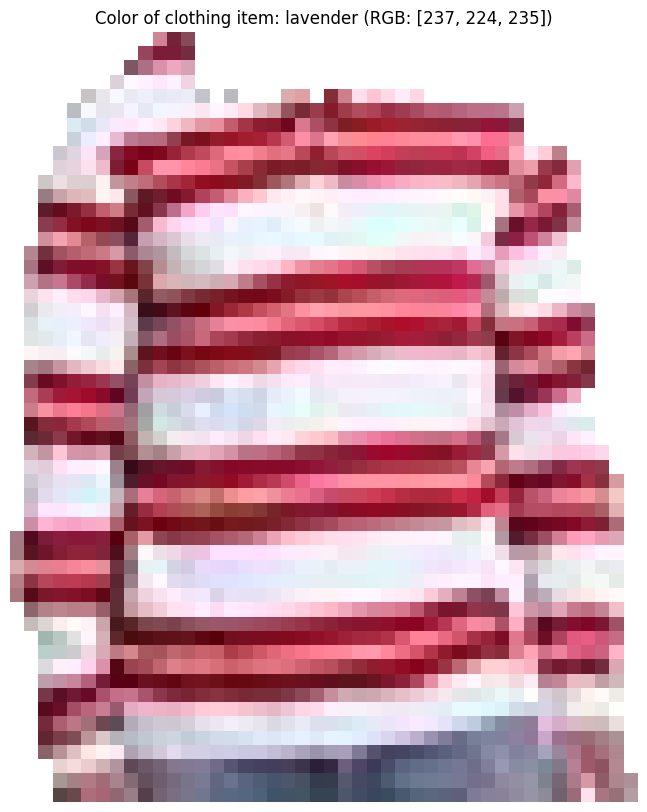

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-1/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


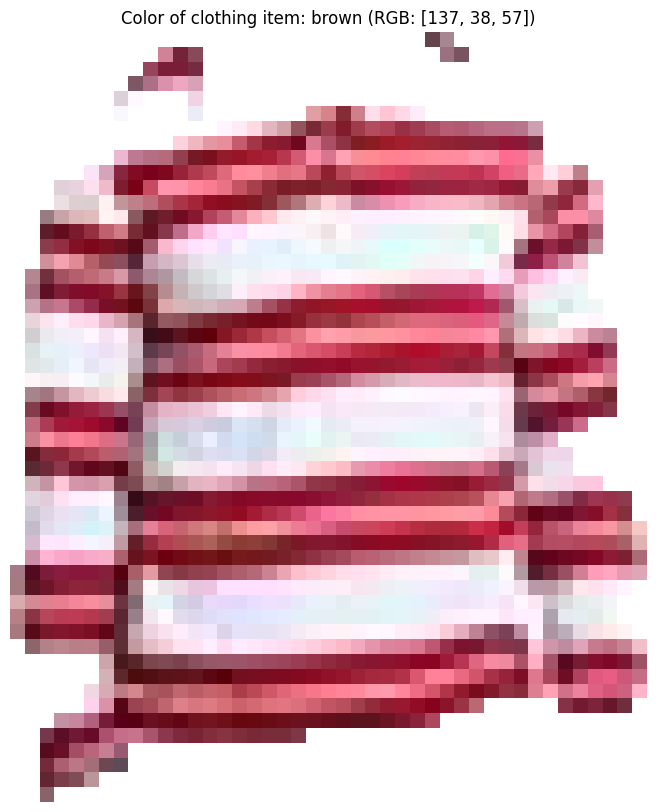

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-1/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2154/object-1/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2154.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/33589.jpg: 640x480 1 dress, 23.7ms
Speed: 3.3ms preprocess, 23.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/33589.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/33589/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


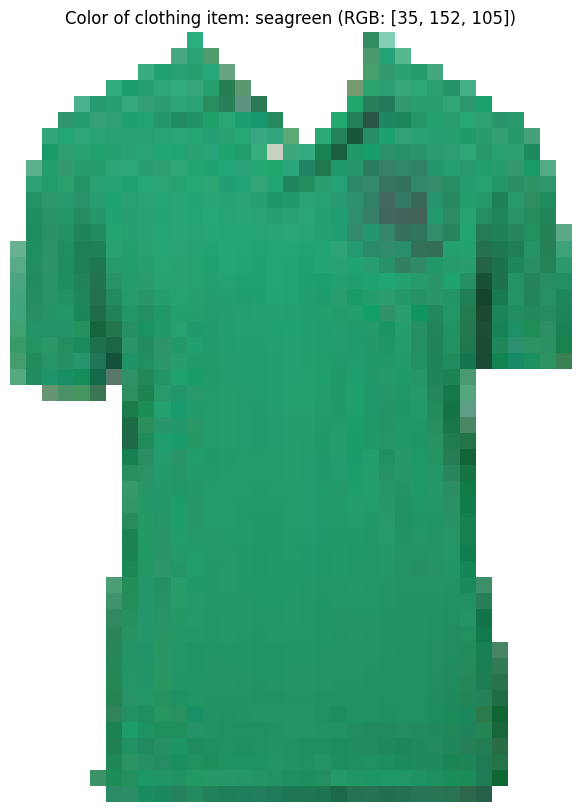

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/33589/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/33589/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/33589.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1533.jpg: 640x480 1 dress, 22.3ms
Speed: 1.8ms preprocess, 22.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1533.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/1533/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


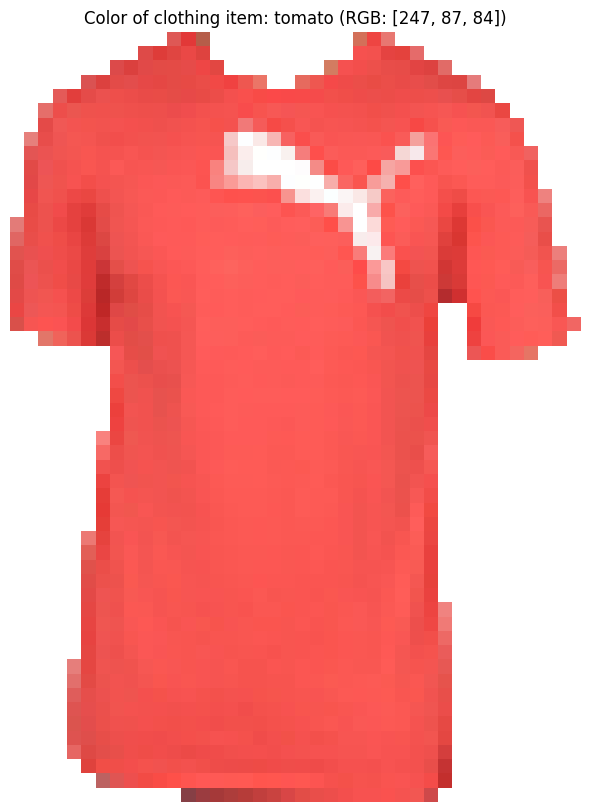

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/1533/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/1533/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1533.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1992.jpg: 640x480 1 dress, 24.7ms
Speed: 2.7ms preprocess, 24.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1992.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/1992/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


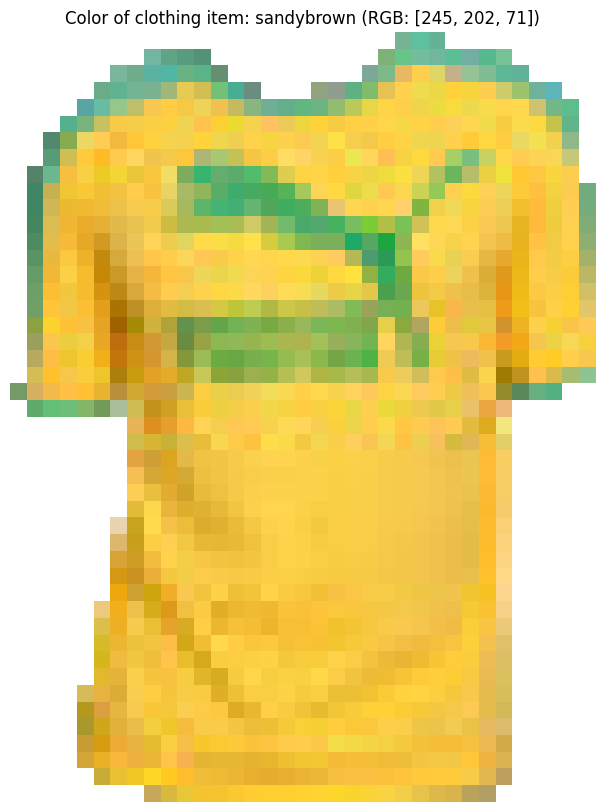

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/1992/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/1992/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1992.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2024.jpg: 640x480 1 dress, 22.5ms
Speed: 2.5ms preprocess, 22.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2024.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2024/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


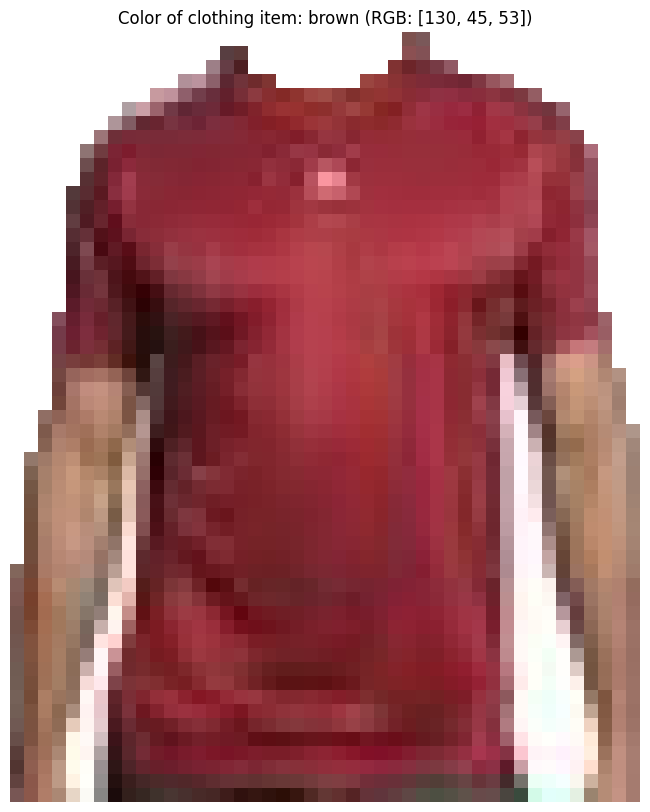

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2024/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2024/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2024.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4745.jpg: 640x480 1 dress, 22.4ms
Speed: 3.8ms preprocess, 22.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4745.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/4745/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


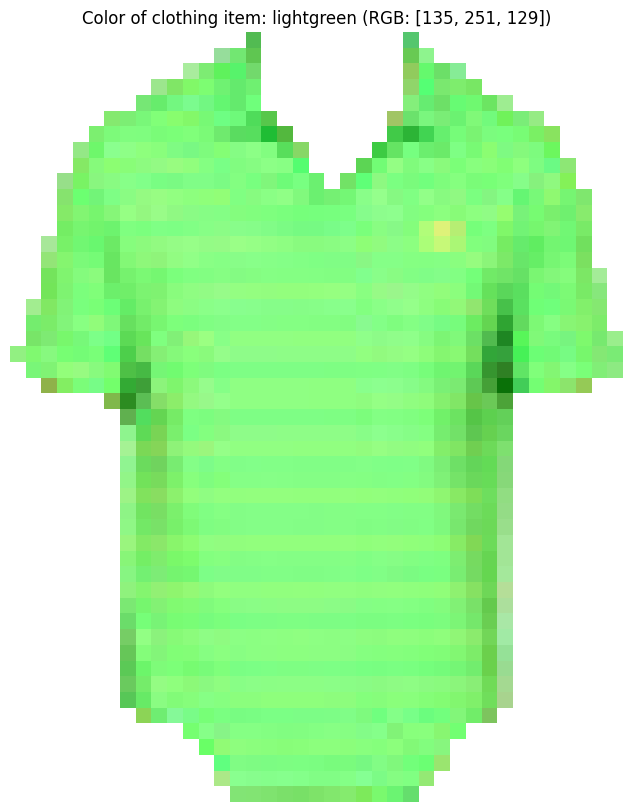

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/4745/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/4745/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4745.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2492.jpg: 640x480 1 dress, 26.5ms
Speed: 2.4ms preprocess, 26.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2492.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2492/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


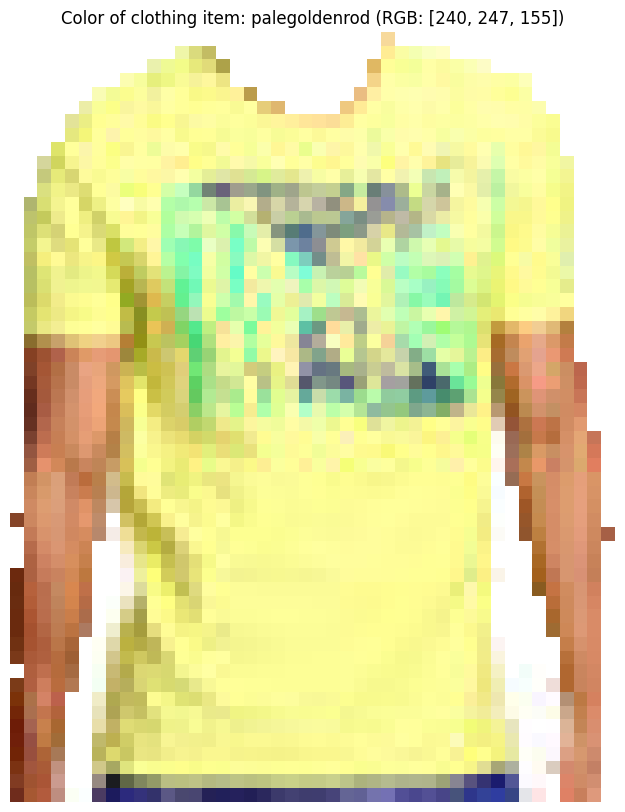

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2492/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2492/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2492.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2480.jpg: 640x480 1 dress, 22.8ms
Speed: 2.4ms preprocess, 22.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2480.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2480/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


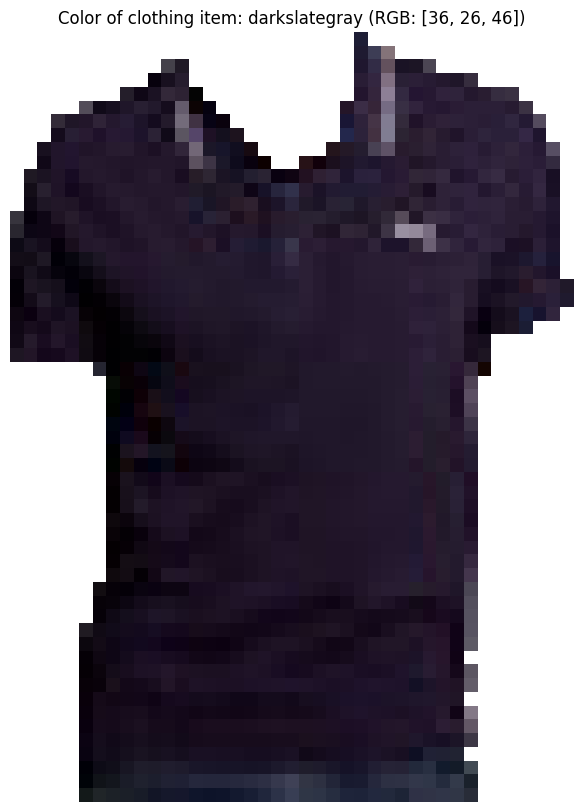

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2480/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2480/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2480.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2400.jpg: 640x480 1 dress, 22.2ms
Speed: 2.5ms preprocess, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2400.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2400/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


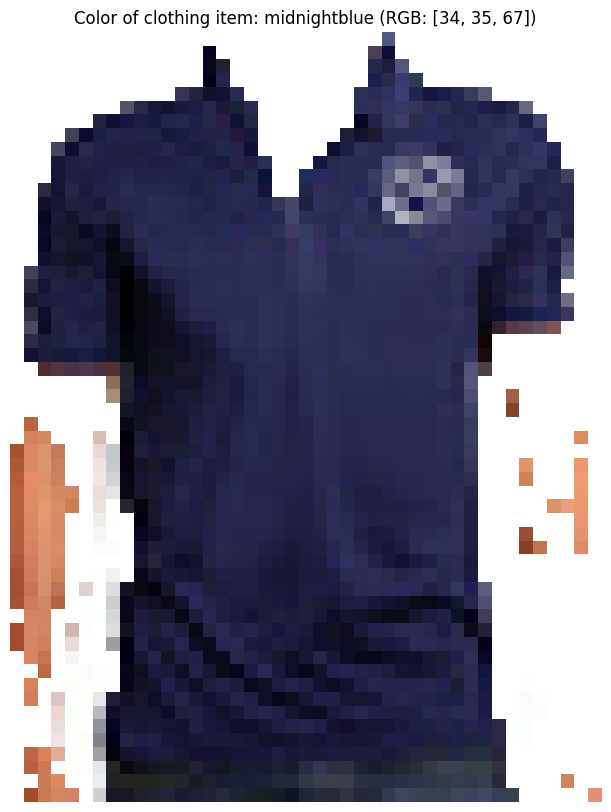

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2400/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2400/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2400.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2478.jpg: 640x480 1 dress, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2478.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2478/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


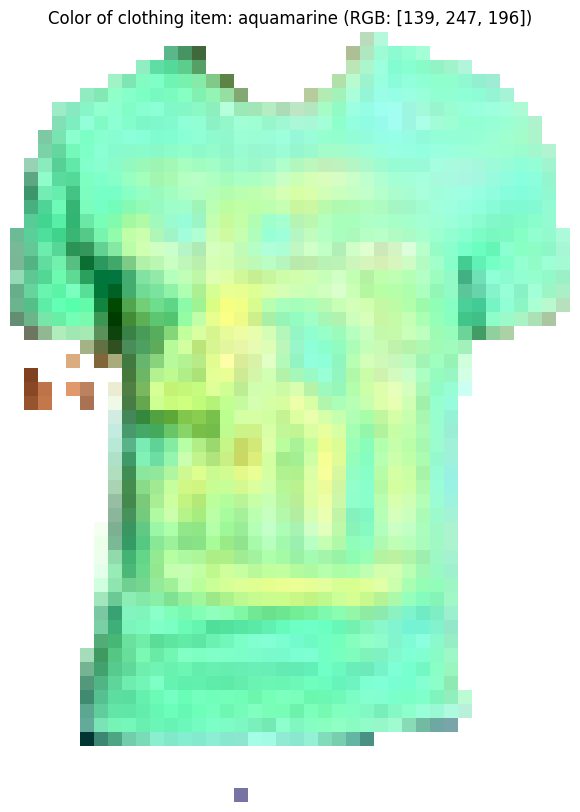

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2478/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2478/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2478.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2479.jpg: 640x480 1 dress, 23.7ms
Speed: 2.5ms preprocess, 23.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2479.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2479/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


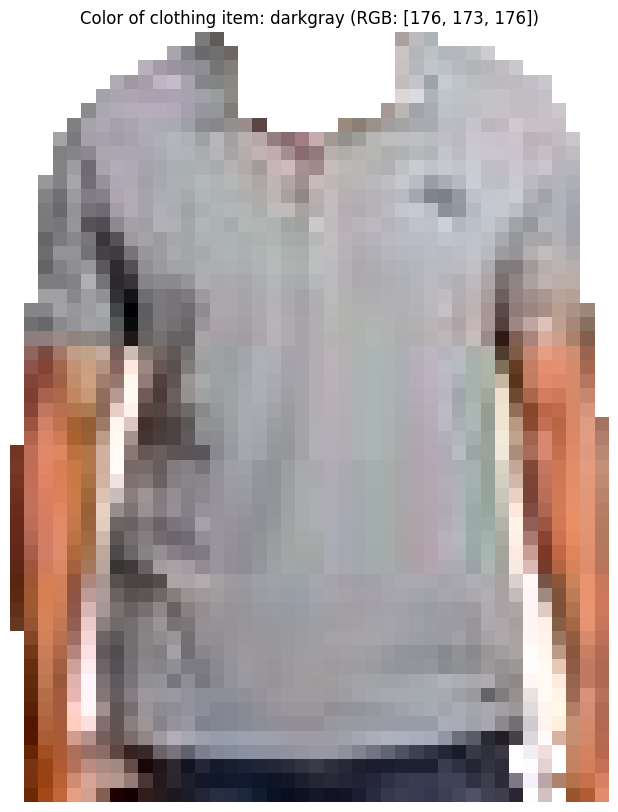

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2479/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2479/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2479.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2343.jpg: 640x480 1 dress, 22.5ms
Speed: 2.7ms preprocess, 22.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2343.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2343/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


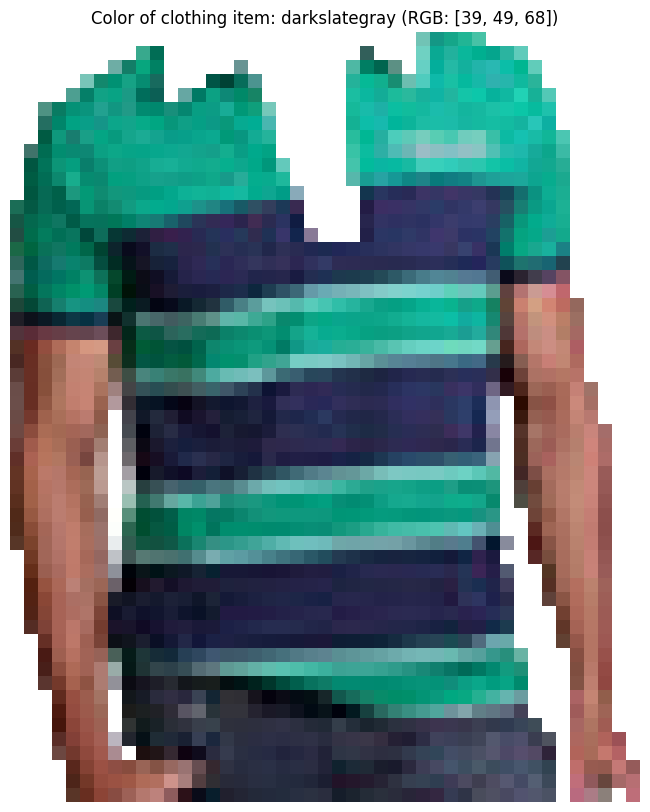

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2343/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2343/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2343.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2491.jpg: 640x480 1 dress, 22.4ms
Speed: 1.7ms preprocess, 22.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2491.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2491/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


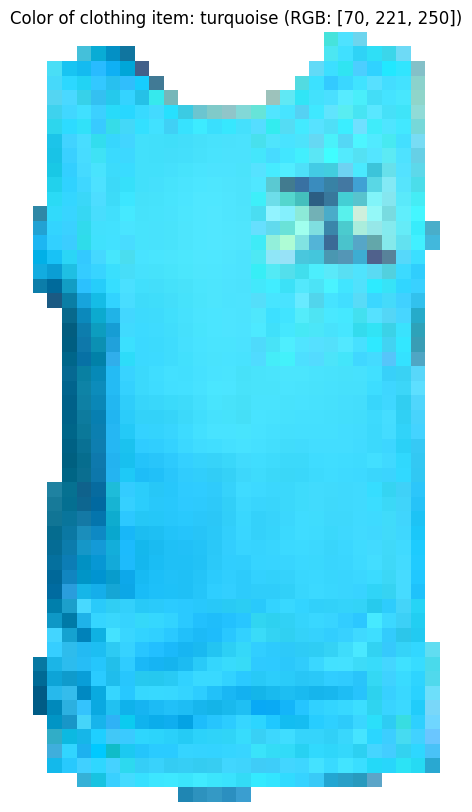

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2491/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2491/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2491.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4986.jpg: 640x480 1 jacket, 1 dress, 21.9ms
Speed: 2.4ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4986.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


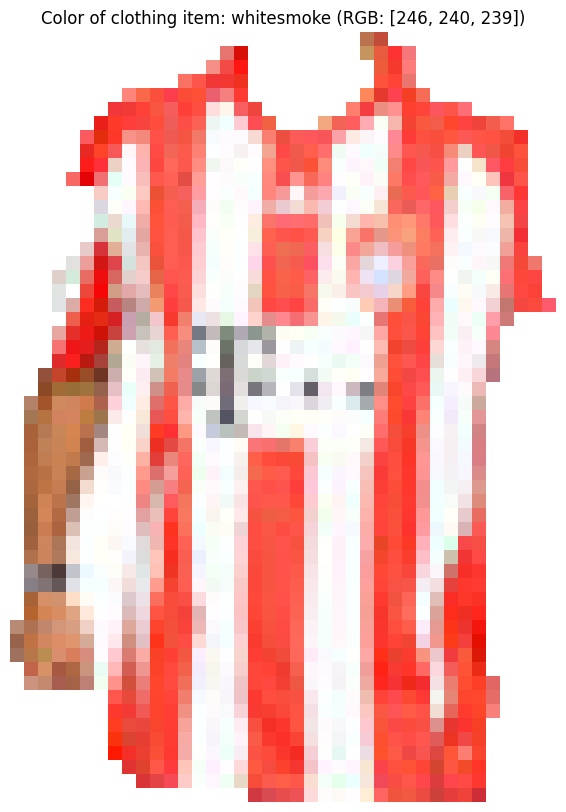

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4986.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-1/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


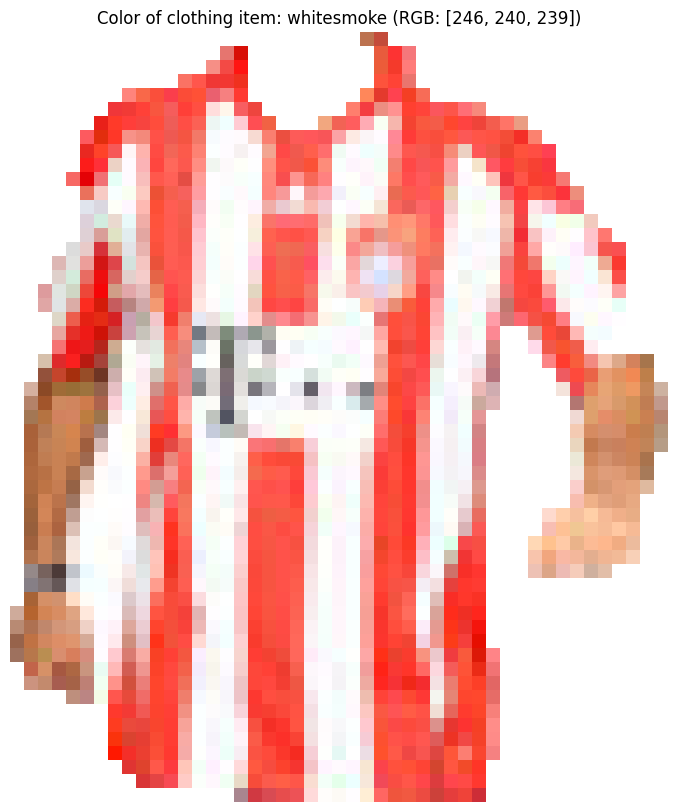

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-1/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/4986/object-1/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4986.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2329.jpg: 640x480 1 dress, 24.0ms
Speed: 2.5ms preprocess, 24.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2329.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2329/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


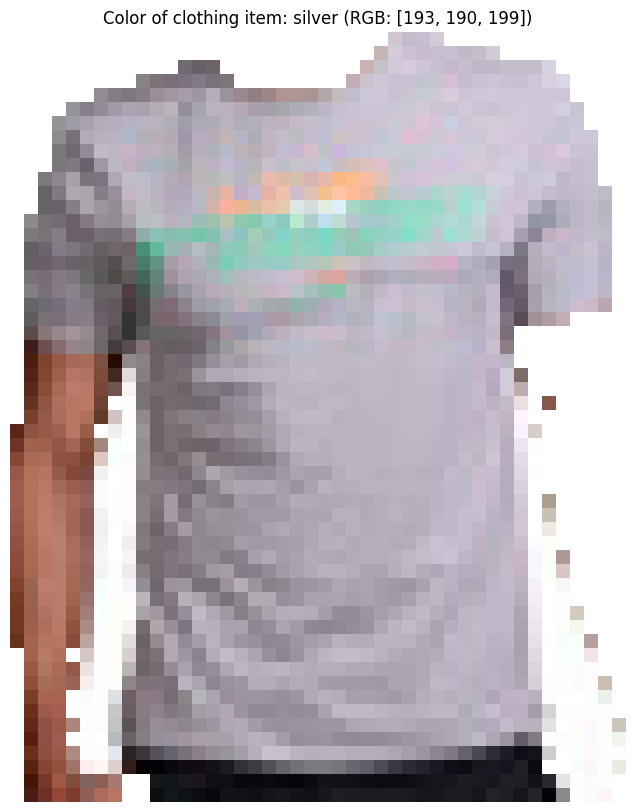

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2329/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2329/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2329.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/3964.jpg: 640x480 1 dress, 22.6ms
Speed: 2.5ms preprocess, 22.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/3964.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/3964/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


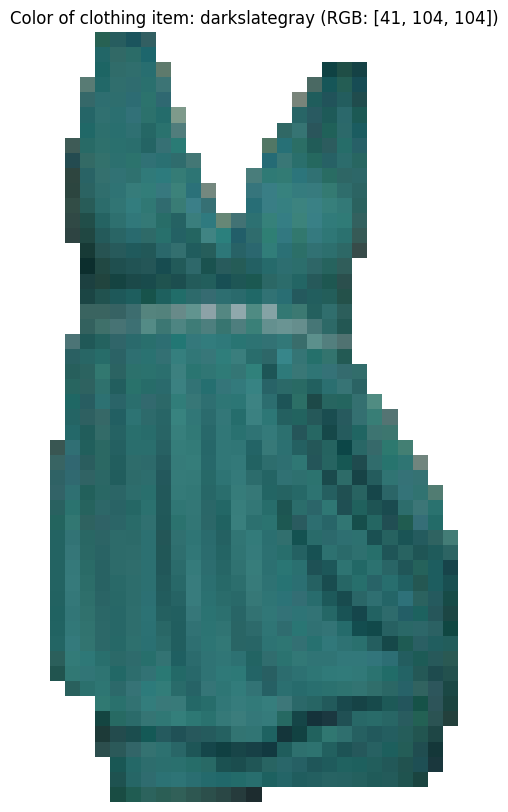

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/3964/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/3964/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/3964.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/3571.jpg: 640x480 1 dress, 21.8ms
Speed: 1.8ms preprocess, 21.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/3571.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/3571/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


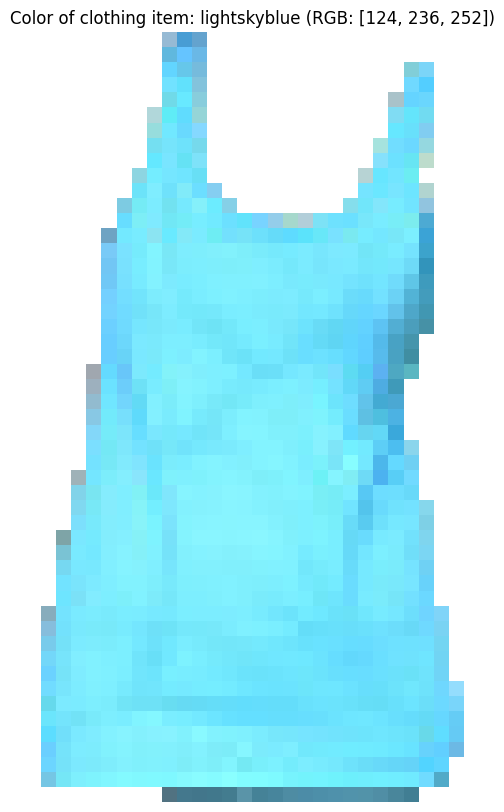

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/3571/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/3571/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/3571.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/4265.jpg: 640x480 1 dress, 21.9ms
Speed: 2.5ms preprocess, 21.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4265.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/4265/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


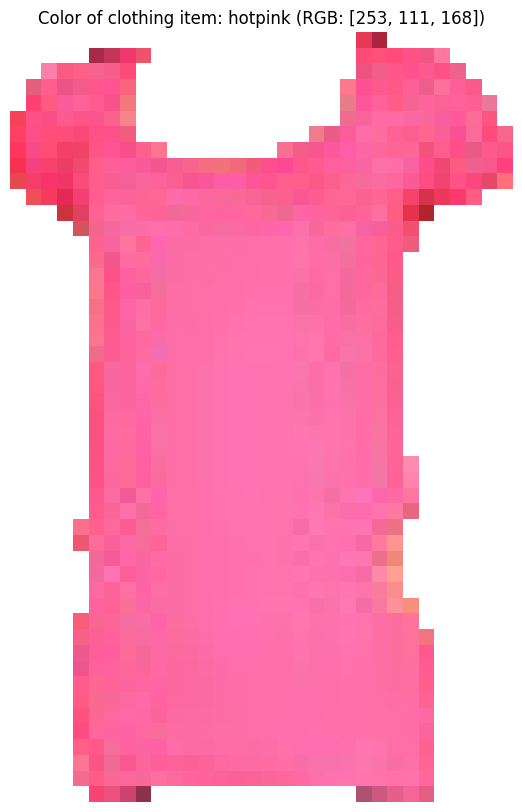

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/4265/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/4265/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/4265.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/1807.jpg: 640x480 1 dress, 21.9ms
Speed: 2.5ms preprocess, 21.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1807.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/1807/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


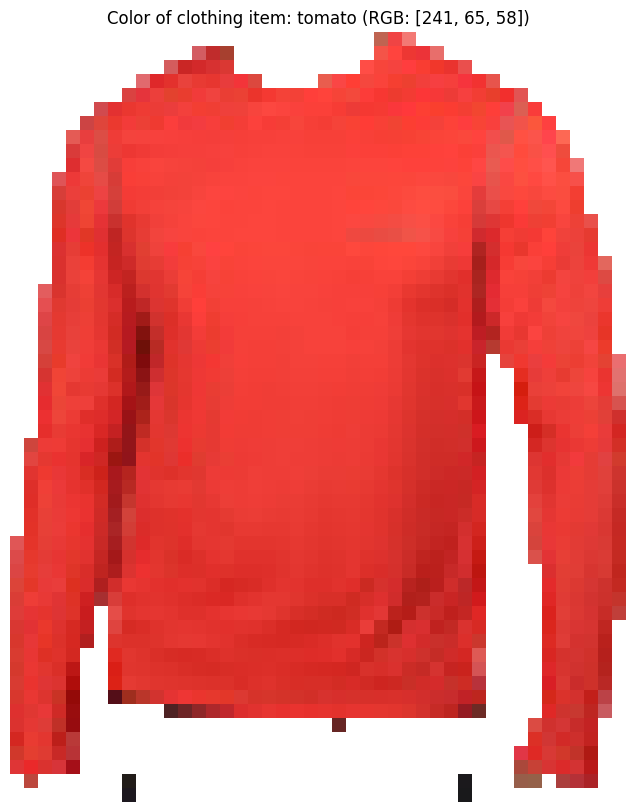

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/1807/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/1807/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/1807.jpg.

image 1/1 /content/drive/MyDrive/new_fashion_dataset/new_images/2158.jpg: 640x480 1 dress, 23.5ms
Speed: 2.4ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Cropping complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2158.jpg.
Processing color for segmented cropped image: /content/drive/MyDrive/new_fashion_dataset/new_images/2158/object-0/segmented_cropped.png


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


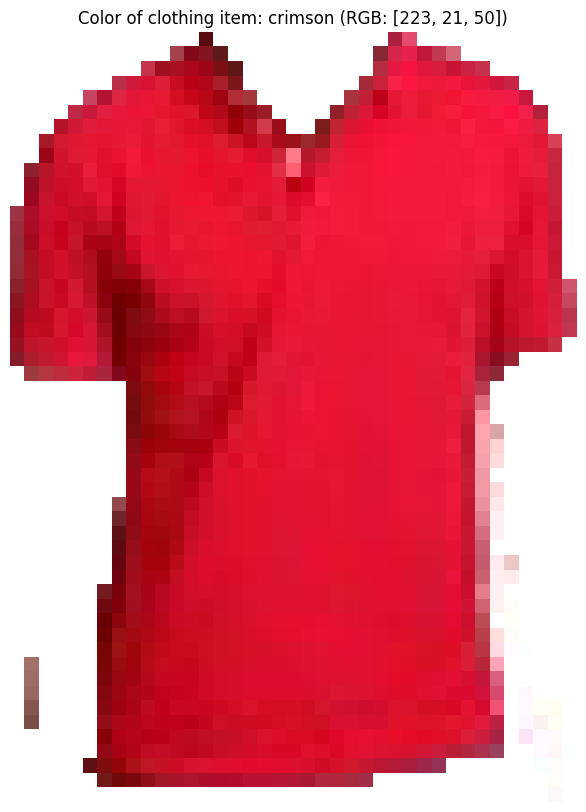

Processed /content/drive/MyDrive/new_fashion_dataset/new_images/2158/object-0/segmented_cropped.png -> /content/drive/MyDrive/new_fashion_dataset/new_images/2158/object-0/color.txt
Segmentation complete for /content/drive/MyDrive/new_fashion_dataset/new_images/2158.jpg.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor
from sklearn.cluster import KMeans

# CSS3 color dictionary
css3_colors = {
    'aliceblue': (240, 248, 255), 'antiquewhite': (250, 235, 215), 'aqua': (0, 255, 255),
    'aquamarine': (127, 255, 212), 'azure': (240, 255, 255), 'beige': (245, 245, 220),
    'bisque': (255, 228, 196), 'black': (0, 0, 0), 'blanchedalmond': (255, 235, 205),
    'blue': (0, 0, 255), 'blueviolet': (138, 43, 226), 'brown': (165, 42, 42),
    'burlywood': (222, 184, 135), 'cadetblue': (95, 158, 160), 'chartreuse': (127, 255, 0),
    'chocolate': (210, 105, 30), 'coral': (255, 127, 80), 'cornflowerblue': (100, 149, 237),
    'cornsilk': (255, 248, 220), 'crimson': (220, 20, 60), 'cyan': (0, 255, 255),
    'darkblue': (0, 0, 139), 'darkcyan': (0, 139, 139), 'darkgoldenrod': (184, 134, 11),
    'darkgray': (169, 169, 169), 'darkgreen': (0, 100, 0), 'darkkhaki': (189, 183, 107),
    'darkmagenta': (139, 0, 139), 'darkolivegreen': (85, 107, 47), 'darkorange': (255, 140, 0),
    'darkorchid': (153, 50, 204), 'darkred': (139, 0, 0), 'darksalmon': (233, 150, 122),
    'darkseagreen': (143, 188, 143), 'darkslateblue': (72, 61, 139), 'darkslategray': (47, 79, 79),
    'darkturquoise': (0, 206, 209), 'darkviolet': (148, 0, 211), 'deeppink': (255, 20, 147),
    'deepskyblue': (0, 191, 255), 'dimgray': (105, 105, 105), 'dodgerblue': (30, 144, 255),
    'firebrick': (178, 34, 34), 'floralwhite': (255, 250, 240), 'forestgreen': (34, 139, 34),
    'fuchsia': (255, 0, 255), 'gainsboro': (220, 220, 220), 'ghostwhite': (248, 248, 255),
    'gold': (255, 215, 0), 'goldenrod': (218, 165, 32), 'gray': (128, 128, 128),
    'green': (0, 128, 0), 'greenyellow': (173, 255, 47), 'honeydew': (240, 255, 240),
    'hotpink': (255, 105, 180), 'indianred': (205, 92, 92), 'indigo': (75, 0, 130),
    'ivory': (255, 255, 240), 'khaki': (240, 230, 140), 'lavender': (230, 230, 250),
    'lavenderblush': (255, 240, 245), 'lawngreen': (124, 252, 0), 'lemonchiffon': (255, 250, 205),
    'lightblue': (173, 216, 230), 'lightcoral': (240, 128, 128), 'lightcyan': (224, 255, 255),
    'lightgoldenrodyellow': (250, 250, 210), 'lightgreen': (144, 238, 144), 'lightgrey': (211, 211, 211),
    'lightpink': (255, 182, 193), 'lightsalmon': (255, 160, 122), 'lightseagreen': (32, 178, 170),
    'lightskyblue': (135, 206, 250), 'lightslategray': (119, 136, 153), 'lightsteelblue': (176, 196, 222),
    'lightyellow': (255, 255, 224), 'lime': (0, 255, 0), 'limegreen': (50, 205, 50),
    'linen': (250, 240, 230), 'magenta': (255, 0, 255), 'maroon': (128, 0, 0),
    'mediumaquamarine': (102, 205, 170), 'mediumblue': (0, 0, 205), 'mediumorchid': (186, 85, 211),
    'mediumpurple': (147, 112, 219), 'mediumseagreen': (60, 179, 113), 'mediumslateblue': (123, 104, 238),
    'mediumspringgreen': (0, 250, 154), 'mediumturquoise': (72, 209, 204), 'mediumvioletred': (199, 21, 133),
    'midnightblue': (25, 25, 112), 'mintcream': (245, 255, 250), 'mistyrose': (255, 228, 225),
    'moccasin': (255, 228, 181), 'navajowhite': (255, 222, 173), 'navy': (0, 0, 128),
    'oldlace': (253, 245, 230), 'olive': (128, 128, 0), 'olivedrab': (107, 142, 35),
    'orange': (255, 165, 0), 'orangered': (255, 69, 0), 'orchid': (218, 112, 214),
    'palegoldenrod': (238, 232, 170), 'palegreen': (152, 251, 152), 'paleturquoise': (175, 238, 238),
    'palevioletred': (219, 112, 147), 'papayawhip': (255, 239, 213), 'peachpuff': (255, 218, 185),
    'peru': (205, 133, 63), 'pink': (255, 192, 203), 'plum': (221, 160, 221),
    'powderblue': (176, 224, 230), 'purple': (128, 0, 128), 'rebeccapurple': (102, 51, 153),
    'red': (255, 0, 0), 'rosybrown': (188, 143, 143), 'royalblue': (65, 105, 225),
    'saddlebrown': (139, 69, 19), 'salmon': (250, 128, 114), 'sandybrown': (244, 164, 96),
    'seagreen': (46, 139, 87), 'seashell': (255, 245, 238), 'sienna': (160, 82, 45),
    'silver': (192, 192, 192), 'skyblue': (135, 206, 235), 'slateblue': (106, 90, 205),
    'slategray': (112, 128, 144), 'snow': (255, 250, 250), 'springgreen': (0, 255, 127),
    'steelblue': (70, 130, 180), 'tan': (210, 180, 140), 'teal': (0, 128, 128),
    'thistle': (216, 191, 216), 'tomato': (255, 99, 71), 'turquoise': (64, 224, 208),
    'violet': (238, 130, 238), 'wheat': (245, 222, 179), 'white': (255, 255, 255),
    'whitesmoke': (245, 245, 245), 'yellow': (255, 255, 0), 'yellowgreen': (154, 205, 50)
}

# Function to find the closest color name from the CSS3 color dictionary
def closest_color(requested_color):
    min_diff = float('inf')
    closest_color_name = None
    for color_name, rgb in css3_colors.items():
        diff = np.sqrt(np.sum((np.array(rgb) - np.array(requested_color)) ** 2))
        if diff < min_diff:
            min_diff = diff
            closest_color_name = color_name
    return closest_color_name

# KMeans clustering function
def kmeans_clustering(image, n_clusters=3):
    pixels = image.reshape(-1, 4)
    pixels = pixels[pixels[:, 3] > 0]
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels[:, :3])
    cluster_centers = kmeans.cluster_centers_
    cluster_centers = (cluster_centers * 255).astype(int)
    labels = kmeans.labels_
    return cluster_centers, labels

# Function to process each segmented patch to find the dominant color
def process_segmented_patch(image):
    cluster_centers, labels = kmeans_clustering(image)
    labels = labels.flatten()
    counts = np.bincount(labels.astype(int))

    total_pixels = len(labels)
    percentages = (counts / total_pixels) * 100

    max_count_idx = np.argmax(percentages)
    dominant_color = cluster_centers[max_count_idx]
    dominant_color_name = closest_color(dominant_color[:3])

    return dominant_color_name, percentages, cluster_centers, counts, dominant_color

# Function to process each image and perform object detection, segmentation, and color detection
def process_image(image_path, save_base_path):
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_rgb = np.array(image)
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    image_dir = os.path.join(save_base_path, f"{image_name}")
    os.makedirs(image_dir, exist_ok=True)

    # Perform inference with YOLO
    results = model(image_path)

    detected_items = []
    crop_counter = 0
    predicted_boxes = []
    crop_dirs = []

    for result in results:
        boxes = result.boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            confidence = box.conf[0].item()         # Get confidence score
            class_id = int(box.cls[0])              # Get class id
            label = model.names[class_id]           # Get label for class id

            detected_items.append({
                'label': label,
                'coordinates': (x1, y1, x2, y2),
                'confidence': confidence
            })

            cropped_dir = os.path.join(image_dir, f"object-{crop_counter}")
            os.makedirs(cropped_dir, exist_ok=True)
            crop_dirs.append(cropped_dir)

            draw = ImageDraw.Draw(image)
            draw.rectangle([x1, y1, x2, y2], outline="green", width=1)

            cropped_filename = os.path.join(cropped_dir, "cropped.jpg")
            cropped_image = image.crop((x1, y1, x2, y2))
            cropped_image.save(cropped_filename)
            predicted_boxes.append([x1, y1, x2, y2])
            crop_counter += 1

    print(f"Cropping complete for {image_path}.")

    # Check if there are any bounding boxes detected
    if len(predicted_boxes) == 0:
        print(f"No objects detected in {image_path}. Skipping segmentation.")
        return  # Skip to the next image if no objects were detected

    # Segmentation with SAM
    predicted_boxes_tensor = torch.tensor(predicted_boxes, dtype=torch.float32).to('cuda')
    transformed_boxes = mask_predictor.transform.apply_boxes_torch(predicted_boxes_tensor, image_bgr.shape[:2])

    mask_predictor.set_image(image_bgr)
    masks, scores, logits = mask_predictor.predict_torch(
        boxes=transformed_boxes.to('cuda'),
        multimask_output=False,
        point_coords=None,
        point_labels=None
    )

    # Save and visualize masks
    for j, mask in enumerate(masks):
        mask = mask[0].cpu().numpy().astype(np.uint8)

        mask_image = Image.fromarray(mask * 255)
        mask_filename = os.path.join(crop_dirs[j], "mask.png")
        mask_image.save(mask_filename)

        isolated_image = image_rgb * mask[:, :, np.newaxis]
        isolated_image_pil = Image.fromarray(isolated_image)

        coords = np.column_stack(np.where(mask > 0))
        if coords.size == 0:
            print(f"No object found for mask {j} in {image_path}")
            continue
        y1, x1 = coords.min(axis=0)
        y2, x2 = coords.max(axis=0)

        isolated_cropped_image = isolated_image[y1:y2+1, x1:x2+1]
        isolated_cropped_image_rgba = np.zeros((y2 - y1 + 1, x2 - x1 + 1, 4), dtype=np.uint8)
        isolated_cropped_image_rgba[..., :3] = isolated_cropped_image
        isolated_cropped_image_rgba[..., 3] = mask[y1:y2+1, x1:x2+1] * 255

        segmented_cropped_filename = os.path.join(crop_dirs[j], "segmented_cropped.png")
        isolated_cropped_image_rgba_pil = Image.fromarray(isolated_cropped_image_rgba, 'RGBA')
        isolated_cropped_image_rgba_pil.save(segmented_cropped_filename)

        # Process color information
        segmented_cropped_image = plt.imread(segmented_cropped_filename)
        print(f"Processing color for segmented cropped image: {segmented_cropped_filename}")
        dominant_color_name, percentages, cluster_centers, counts, dominant_color = process_segmented_patch(segmented_cropped_image)

        # Save the processed color information in a text file
        text_filename = os.path.join(crop_dirs[j], "color.txt")
        with open(text_filename, 'w') as f:
            f.write(f"Color of clothing item: {dominant_color_name} (RGB: {dominant_color.tolist()}).\n")
            f.write(f"Final Colors: {cluster_centers.tolist()}\n")
            for idx, color_center in enumerate(cluster_centers):
                color_name = closest_color(color_center[:3])
                f.write(f"Color Name: {color_name}, RGB: {color_center.tolist()}\n")
            f.write(f"Counts of cluster pixels: {counts.tolist()}\n")
            f.write(f"Percentages: {percentages.tolist()}\n")
            f.write(f"Dominant Cluster: {np.argmax(counts)}\n")

        # Visualization of the isolated_cropped_image_rgba_pil
        plt.figure(figsize=(10, 10))
        plt.imshow(isolated_cropped_image_rgba_pil)
        plt.axis('off')
        plt.title(f"Color of clothing item: {dominant_color_name} (RGB: {dominant_color.tolist()})")
        plt.show()

        print(f"Processed {segmented_cropped_filename} -> {text_filename}")
        print(f"Segmentation complete for {image_path}.")

# Define base paths
base_path = "/content/drive/MyDrive/object_detection"
new_base_path = '/content/drive/MyDrive/new_fashion_dataset/new_images'

# Load the trained YOLO model
yolo_weights_path = os.path.join(base_path, 'runs', 'detect', 'train', 'weights', 'best.pt')
sam_model_path = os.path.join(base_path, "object_detection_yolov8/sam_vit_h_4b8939.pth")
model = YOLO(yolo_weights_path)
sam = sam_model_registry["vit_h"](checkpoint=sam_model_path).to(device=torch.device('cuda:0'))
mask_predictor = SamPredictor(sam)

# Process each image in the new_images_path directory
for image_file in os.listdir(new_base_path):
    sample_image_path = os.path.join(new_base_path, image_file)
    process_image(sample_image_path, new_base_path)